In [1]:
import glob
import json
import pathlib
import string
import numpy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from formula_coercion import formula_intervention_interference as formulas

In [2]:
STOP_WORDS = set(stopwords.words("english"))
for w in ['', 'would', 'could', 'use', 'also', 'another', 'must', 'shall',
          'said', 'among', 'much', 'made', 'fact', "“", "”", "’"]:
    STOP_WORDS.add(w)

TABLE_PUNCT = str.maketrans("", "", string.punctuation)

def get_words(text):

    # Remove dots
    text = text.replace("·", " ")
    text = text.replace("•", " ")

    # split into words
    tokens = word_tokenize(text)

    words = []
    for i, w in enumerate(tokens):

        if "(" in w or ")" in w or ":" in w:
             words.append(w)

        else:
            # convert to lower case and remove punctuations
            w = w.lower().translate(TABLE_PUNCT)

            # Remove short words and stop words
            if len(w) > 2 and w not in STOP_WORDS:

                # Keep 1 digit long and 4 digits long numbers.
                if any(v.isdigit() for v in w):
                    if len(w) == 1 or len(w) == 4:
                    #if re.match(r'([1-3][0-9]{3})', w) is not None:
                        words.append(w)

                # Keep the words made entirely of alphabetic characters
                elif w.isalpha():
                    words.append(w)

    return words

## Find formulas in texts

In [3]:
from ..downloader import keywords

In [4]:
def find_first_level_formula(tokens, keyword):
    idxs = []
    for i, word in enumerate(tokens):
        if keyword in word:
            idxs.append(i)
    return idxs

In [5]:
from utils import find_sequence_in_tokens 

idsz_past = []

for keyword in keywords:

    for path in glob.glob("./{}/*.json".format(keyword)):

        metadata = json.load(open(path))
        
        print(path)
        
        current_formulas = []
        
        for first_level_formula in formulas:

            for idx in find_first_level_formula(metadata['content_tokenized_formula'], first_level_formula):

                width_crop = 20
                begin_crop = max(0, idx - width_crop)
                end_crop = min(len(metadata['content_tokenized_formula']), idx + width_crop)
                cropped_tokens = metadata['content_tokenized_formula'][begin_crop:end_crop]

                for second_level_formula in formulas[first_level_formula]:
                    if find_sequence_in_tokens(get_words(second_level_formula), cropped_tokens):

                        current_formula = [first_level_formula, second_level_formula]
                        found_another = False
                        for third_level_formula in formulas[first_level_formula][second_level_formula]:

                            if third_level_formula != '':
                                if find_sequence_in_tokens(get_words(third_level_formula), cropped_tokens):
                                    final_formula = [first_level_formula, second_level_formula, third_level_formula]
                                    found_another = True
                                    current_formulas.append([idx, final_formula])

                        if '' in formulas[first_level_formula][second_level_formula] and not found_another:
                            current_formulas.append([idx, current_formula])

        print(current_formulas)
        print()
        # Save results
        metadata['formulas'] = current_formulas
        with open(path, "w+") as fp:
            json.dump(metadata, fp, indent=2)

./non-intervention/N0426881.json
[[171398, ['interven', 'aggression', 'occupation']], [171398, ['interven', 'aggression', 'military']], [171468, ['interven', 'aggression', 'occupation']], [171468, ['interven', 'aggression', 'military']], [171489, ['interven', 'aggression', 'occupation']], [171489, ['interven', 'aggression', 'military']], [171565, ['interven', 'aggression', 'occupation']], [171565, ['interven', 'aggression', 'military']]]

./non-intervention/N1534276.json
[]

./non-intervention/NL670365.json
[]

./non-intervention/N8831271.json
[]

./non-intervention/G1521869.json
[]

./non-intervention/G1014378.json
[[260, ['interfer', 'coercive']], [797, ['interfer', 'coercive']]]

./non-intervention/N0958787.json
[]

./non-intervention/N0265955.json
[]

./non-intervention/G1523442.json
[]

./non-intervention/N8717078.json
[]

./non-intervention/N8522451.json
[]

./non-intervention/V9857824.json
[]

./non-intervention/V1051751.json
[]

./non-intervention/G1911962.json
[]

./non-interv

./non-intervention/N1239642.json
[[580, ['interven', 'coercive']], [2700, ['interven', 'coercion', 'coercion']], [2700, ['interven', 'coercion', 'unilateral']], [13551, ['interven', 'coercive']], [2701, ['interfer', 'coercion', 'coercion']], [2701, ['interfer', 'coercion', 'unilateral']], [5268, ['interfer', 'terrorism']], [14304, ['interfer', 'coercive']], [16292, ['interfer', 'coercive']], [17827, ['interfer', 'coercion', 'coercion']], [18216, ['interfer', 'coercion', 'economic coercion']], [18216, ['interfer', 'coercion', 'coercion']], [18216, ['interfer', 'coercion', 'unilateral']]]

./non-intervention/N1036950.json
[]

./non-intervention/N9446288.json
[]

./non-intervention/N1613644.json
[[2999, ['interfer', 'terrorism']]]

./non-intervention/N0541563.json
[]

./non-intervention/N9358854.json
[]

./non-intervention/N9623115.json
[]

./non-intervention/N0734304.json
[]

./non-intervention/N0756938.json
[]

./non-intervention/N0752428.json
[[3857, ['interven', 'terrorist']]]

./non-

./non-intervention/N1812344.json
[[9893, ['interfer', 'peaceful means']]]

./non-intervention/N8856205.json
[]

./non-intervention/N1611024.json
[[3005, ['interven', 'terrorism']]]

./non-intervention/N9634609.json
[]

./non-intervention/V1601764.json
[]

./non-intervention/NL322787.json
[]

./non-intervention/N0127102.json
[]

./non-intervention/N1710629.json
[[8413, ['interven', 'terrorism']], [26228, ['interfer', 'terrorist', 'terrorism']], [26228, ['interfer', 'terrorism', 'terrorist']]]

./non-intervention/N0659976.json
[]

./non-intervention/N9637160.json
[]

./non-intervention/N5734759.json
[[3706, ['interven', 'aggression']], [9233, ['interven', 'aggression']], [9303, ['interven', 'aggression', 'military']], [11066, ['interfer', 'aggression']], [11082, ['interfer', 'aggression']]]

./non-intervention/N9925773.json
[]

./non-intervention/N0640311.json
[]

./non-intervention/N1150702.json
[]

./non-intervention/N0268280.json
[]

./non-intervention/N7018986.json
[[414, ['interven'

[[418, ['interven', 'aggression', 'military']], [538, ['interven', 'aggression', 'military']], [538, ['interven', 'aggression', 'mercenaries']], [1930, ['interven', 'subversion']], [539, ['interfer', 'aggression', 'military']], [539, ['interfer', 'aggression', 'mercenaries']], [1948, ['interfer', 'subversion']]]

./non-intervention/N9986581.json
[[438, ['interven', 'coercive']]]

./non-intervention/N1737521.json
[[609, ['interfer', 'peaceful means']]]

./non-intervention/N9586600.json
[]

./non-intervention/NL320112.json
[]

./non-intervention/N9112252.json
[]

./non-intervention/N1470786.json
[]

./non-intervention/N1520700.json
[]

./non-intervention/N8656765.json
[[160, ['interven', 'aggression', 'armed']], [169, ['interven', 'aggression', 'armed']], [3920, ['interven', 'peaceful means']], [3921, ['interfer', 'peaceful means']]]

./non-intervention/N1732959.json
[]

./non-intervention/N1249018.json
[]

./non-intervention/N8960429.json
[[955, ['interven', 'coercion', 'coercion']], [9

./non-intervention/NL321256.json
[[670, ['interven', 'coercive']], [693, ['interven', 'coercive']], [1542, ['interven', 'subversive', 'subversive']], [1542, ['interven', 'subversion']], [1565, ['interven', 'subversive', 'overthrow']], [1565, ['interven', 'subversive', 'subversive']], [1565, ['interven', 'subversion', 'overthrow']], [1755, ['interven', 'subversive', 'subversive']]]

./non-intervention/N1160225.json
[[2609, ['interven', 'terrorism']]]

./non-intervention/G1817171.json
[]

./non-intervention/G0113344.json
[]

./non-intervention/N9486467.json
[]

./non-intervention/V1702354.json
[]

./non-intervention/N1468030.json
[]

./non-intervention/N1510460.json
[]

./non-intervention/NL153527.json
[[32, ['interven', 'aggression']], [64, ['interven', 'aggression']], [253, ['interven', 'aggression']], [413, ['interven', 'aggression']], [487, ['interven', 'aggression']], [1447, ['interven', 'aggression', 'armed']], [1447, ['interven', 'aggression', 'mercenaries']], [424, ['interfer', '

./non-intervention/NL310970.json
[]

./non-intervention/NL300970.json
[]

./non-intervention/N9637423.json
[]

./non-intervention/N0847121.json
[]

./non-intervention/N9447046.json
[]

./non-intervention/N0063938.json
[]

./non-intervention/N1634412.json
[]

./non-intervention/N0023275.json
[]

./non-intervention/NL750795.json
[[62444, ['interven', 'terrorist']], [68900, ['interven', 'aggression', 'military']], [119469, ['interven', 'aggression', 'military']], [143184, ['interfer', 'subversive', 'subversive']], [143184, ['interfer', 'subversion']], [147177, ['interfer', 'terrorism']]]

./non-intervention/N7521962.json
[[1182, ['interven', 'aggression', 'occupation']], [1196, ['interven', 'coercion', 'economic coercion']], [1196, ['interven', 'coercion', 'coercion']], [1196, ['interven', 'aggression', 'occupation']], [1196, ['interven', 'aggression', 'military']], [1699, ['interven', 'aggression', 'occupation']], [1713, ['interven', 'coercion', 'economic coercion']], [1713, ['interven',

./non-intervention/V1911468.json
[]

./non-intervention/V9990532.json
[]

./non-intervention/N0558313.json
[]

./non-intervention/NL321489.json
[[1788, ['interven', 'aggression']], [2842, ['interfer', 'aggression']]]

./non-intervention/V1901192.json
[]

./non-intervention/N7599996.json
[]

./non-intervention/N1818953.json
[[4637, ['interven', 'aggression']]]

./non-intervention/N9443967.json
[]

./non-intervention/N9121657.json
[]

./non-intervention/N9035126.json
[[2963, ['interfer', 'coercion', 'exploitation']], [2963, ['interfer', 'coercion', 'coercion']]]

./non-intervention/NL305093.json
[]

./non-intervention/N8918357.json
[]

./non-intervention/NL680448.json
[]

./non-intervention/N9444522.json
[]

./non-intervention/N8634046.json
[]

./non-intervention/N1632661.json
[]

./non-intervention/V0382218.json
[]

./non-intervention/NL317692.json
[]

./non-intervention/NL307738.json
[]

./non-intervention/G0360551.json
[]

./non-intervention/N1835542.json
[[2079, ['interfer', 'aggress

./non-intervention/G1618425.json
[]

./non-intervention/N1634454.json
[]

./non-intervention/NL316698.json
[[1935, ['interven', 'aggression', 'military']], [2259, ['interven', 'peaceful means']], [3282, ['interven', 'subversive', 'subversive']], [3390, ['interven', 'subversive', 'subversive']], [3390, ['interven', 'aggression']]]

./non-intervention/V9983769.json
[]

./non-intervention/G9412017.json
[[1264, ['interfer', 'aggression']]]

./non-intervention/N9733251.json
[]

./non-intervention/N0745631.json
[]

./non-intervention/NL322778.json
[]

./non-intervention/N1738650.json
[]

./non-intervention/G9416687.json
[]

./non-intervention/N9985450.json
[]

./non-intervention/N8720655.json
[]

./non-intervention/N8913029.json
[]

./non-intervention/N0640028.json
[]

./non-intervention/N9725556.json
[[81, ['interfer', 'coercive']]]

./non-intervention/NL301274.json
[]

./non-intervention/V0057665.json
[]

./non-intervention/N0248299.json
[]

./non-intervention/N1156279.json
[]

./non-inter

./non-intervention/N1835621.json
[]

./non-intervention/NL326756.json
[[45597, ['interven', 'subversion']]]

./non-intervention/N8663354.json
[[5578, ['interven', 'aggression', 'occupation']]]

./non-intervention/NL305173.json
[[1203, ['interven', 'peaceful means']]]

./non-intervention/N1712393.json
[]

./non-intervention/N1262964.json
[[387, ['interven', 'terrorism', 'assist']]]

./non-intervention/N9437046.json
[]

./non-intervention/N1537493.json
[]

./non-intervention/N9534508.json
[]

./non-intervention/N9721128.json
[]

./non-intervention/N9386563.json
[]

./non-intervention/V0188246.json
[]

./non-intervention/N1904619.json
[]

./non-intervention/G0516105.json
[]

./non-intervention/N1156869.json
[]

./non-intervention/V0983809.json
[]

./non-intervention/G0113640.json
[]

./non-intervention/N0632268.json
[[163, ['interfer', 'aggression', 'military']]]

./non-intervention/N0235793.json
[]

./non-intervention/NL306421.json
[[78, ['interfer', 'subversive', 'subversive']], [169, [

./non-intervention/N8603963.json
[]

./non-intervention/N0938616.json
[]

./non-intervention/NL308632.json
[]

./non-intervention/N9362938.json
[]

./non-intervention/G1061141.json
[]

./non-intervention/N1934173.json
[]

./non-intervention/N0665653.json
[]

./non-intervention/N1920999.json
[[9837, ['interven', 'terrorism']], [23940, ['interven', 'terrorism']], [16327, ['interfer', 'terrorism']], [19051, ['interfer', 'terrorism']], [19051, ['interfer', 'aggression']], [22544, ['interfer', 'terrorism']], [22544, ['interfer', 'aggression']]]

./non-intervention/G1210067.json
[[896, ['interven', 'coercive']], [904, ['interven', 'coercive']], [911, ['interven', 'coercive']], [1075, ['interven', 'coercive']], [1086, ['interven', 'coercive']], [1099, ['interven', 'coercive']], [1118, ['interven', 'coercion', 'coercion']], [1326, ['interven', 'coercion', 'coercion']], [1326, ['interven', 'coercive']], [1378, ['interven', 'coercive']], [1402, ['interven', 'coercive']], [914, ['interfer', 'coer

./non-intervention/N1824987.json
[[10014, ['interven', 'terrorism']]]

./non-intervention/N0640272.json
[]

./non-intervention/G1820567.json
[]

./non-intervention/N1354282.json
[]

./non-intervention/N0860736.json
[]

./non-intervention/N0227936.json
[]

./non-intervention/N7011450.json
[[7231, ['interven', 'subversion']], [7231, ['interven', 'terrorism']], [7241, ['interven', 'subversion']], [7241, ['interven', 'terrorism']], [7248, ['interven', 'subversion']], [7248, ['interven', 'terrorism']], [7255, ['interfer', 'subversion']], [7255, ['interfer', 'terrorism']], [13269, ['interfer', 'peaceful means']]]

./non-intervention/NL307401.json
[]

./non-intervention/N1467789.json
[[16576, ['interfer', 'terrorism']]]

./non-intervention/N0265246.json
[]

./non-intervention/NL305083.json
[[158, ['interfer', 'aggressive']], [1313, ['interfer', 'aggressive']]]

./non-intervention/NL880397.json
[]

./non-intervention/N1938794.json
[]

./non-intervention/G1262123.json
[]

./non-intervention/G14

./non-intervention/G9414418.json
[]

./non-intervention/NL316656.json
[[1941, ['interven', 'aggression']], [1972, ['interven', 'aggression']]]

./non-intervention/N1022017.json
[]

./non-intervention/N0353450.json
[[11348, ['interven', 'terrorism']], [11352, ['interven', 'terrorism']], [11391, ['interven', 'aggression', 'groups']]]

./non-intervention/N1152974.json
[[4222, ['interven', 'terrorist']], [4914, ['interven', 'terrorist']], [4788, ['interfer', 'aggression']]]

./non-intervention/N0356202.json
[]

./non-intervention/N9930405.json
[]

./non-intervention/NL316713.json
[]

./non-intervention/N1341079.json
[[1974, ['interfer', 'coercive']]]

./non-intervention/NL305095.json
[[2055, ['interfer', 'subversion']], [3525, ['interfer', 'terrorism']]]

./non-intervention/N8663318.json
[[500, ['interfer', 'terrorism']], [5119, ['interfer', 'terrorism']]]

./non-intervention/N9614774.json
[]

./non-intervention/N7858650.json
[[2887, ['interven', 'terrorism']], [2899, ['interven', 'terrori

./non-intervention/G1217756.json
[]

./non-intervention/N0455576.json
[]

./non-intervention/N1257113.json
[]

./non-intervention/N0067793.json
[]

./non-intervention/G1907203.json
[]

./non-intervention/N5734908.json
[]

./non-intervention/N9782748.json
[]

./non-intervention/NL318081.json
[[1730, ['interven', 'terrorism']]]

./non-intervention/V1506319.json
[]

./non-intervention/N0127596.json
[]

./non-intervention/N1935145.json
[]

./non-intervention/NL300632.json
[]

./non-intervention/N1645469.json
[]

./non-intervention/N1635291.json
[]

./non-intervention/N0952179.json
[[14132, ['interven', 'terrorism']], [6093, ['interfer', 'aggressive']]]

./non-intervention/NL315060.json
[]

./non-intervention/N9444752.json
[]

./non-intervention/V0587363.json
[]

./non-intervention/N6725286.json
[]

./non-intervention/V9980892.json
[]

./non-intervention/N1810885.json
[[7819, ['interven', 'terrorist']]]

./non-intervention/N9681590.json
[]

./non-intervention/N8563357.json
[[3896, ['interve

./non-intervention/G0561812.json
[]

./non-intervention/NL323241.json
[]

./non-intervention/N8558251.json
[]

./non-intervention/G9821224.json
[]

./non-intervention/N0827458.json
[]

./non-intervention/N9482377.json
[]

./non-intervention/N0059301.json
[[49318, ['interven', 'aggression', 'occupation']], [49318, ['interven', 'aggression', 'military']]]

./non-intervention/N9362718.json
[]

./non-intervention/N0958688.json
[]

./non-intervention/G0441554.json
[]

./non-intervention/G0443093.json
[]

./non-intervention/S6900003.json
[]

./non-intervention/N9486158.json
[]

./non-intervention/N1060301.json
[]

./non-intervention/N8626374.json
[]

./non-intervention/N9501915.json
[]

./non-intervention/N8732110.json
[]

./non-intervention/N0847023.json
[]

./non-intervention/N1061005.json
[]

./non-intervention/V1501665.json
[]

./non-intervention/N1459317.json
[]

./non-intervention/N9525676.json
[]

./non-intervention/N1710911.json
[]

./non-intervention/N9782334.json
[]

./non-interven

./non-intervention/N0452160.json
[[17982, ['interven', 'terrorism']]]

./non-intervention/N1544392.json
[]

./non-intervention/G0062249.json
[]

./non-intervention/N0959720.json
[]

./non-intervention/NL316659.json
[[2232, ['interven', 'peaceful means']]]

./non-intervention/N1804328.json
[]

./non-intervention/N9628546.json
[[3509, ['interven', 'coercive']], [1976, ['interfer', 'coerce']]]

./non-intervention/N8763327.json
[[2596, ['interven', 'aggression']], [9100, ['interven', 'peaceful means']], [3509, ['interfer', 'coercion', 'economic coercion']], [3509, ['interfer', 'coercion', 'coercion']], [3509, ['interfer', 'aggression', 'occupation']], [9101, ['interfer', 'peaceful means']]]

./non-intervention/N9885272.json
[]

./non-intervention/N9023653.json
[]

./non-intervention/N0458795.json
[]

./non-intervention/N0362729.json
[]

./non-intervention/N1600918.json
[]

./non-intervention/G0343869.json
[]

./non-intervention/N9977545.json
[]

./non-intervention/N9434982.json
[]

./non-i

./non-intervention/N0762034.json
[]

./non-intervention/N1061821.json
[]

./non-intervention/N5704723.json
[]

./non-intervention/N1227025.json
[]

./non-intervention/G9911654.json
[]

./non-intervention/NL306301.json
[]

./non-intervention/NL315038.json
[[598, ['interven', 'peaceful means']], [2035, ['interven', 'peaceful means']], [6500, ['interven', 'aggression']], [7244, ['interven', 'peaceful means']], [5736, ['interfer', 'peaceful means']], [5846, ['interfer', 'aggression']], [6576, ['interfer', 'aggression']], [6630, ['interfer', 'aggression']], [6745, ['interfer', 'aggressive']]]

./non-intervention/N0529644.json
[[3883, ['interfer', 'terrorism']]]

./non-intervention/N0956532.json
[[364, ['interfer', 'peaceful means']]]

./non-intervention/V1701619.json
[]

./non-intervention/N0345315.json
[]

./non-intervention/V1055385.json
[]

./non-intervention/G0110170.json
[]

./non-intervention/NL750860.json
[[451, ['interven', 'aggression', 'armed']]]

./non-intervention/N0443415.json


./non-intervention/N0765636.json
[]

./non-intervention/N9445033.json
[]

./non-intervention/N0144062.json
[]

./non-intervention/V0250919.json
[]

./non-intervention/G1142900.json
[[1214, ['interven', 'peaceful means']]]

./non-intervention/G1611523.json
[]

./non-intervention/V9983858.json
[]

./non-intervention/NL306415.json
[[320, ['interven', 'peaceful means', 'international disputes by peaceful means']], [1385, ['interven', 'coercive']], [78, ['interfer', 'subversive', 'subversive']], [171, ['interfer', 'subversive', 'subversive']], [730, ['interfer', 'subversive', 'subversive']], [1138, ['interfer', 'peaceful means']], [1138, ['interfer', 'subversive', 'subversive']], [1138, ['interfer', 'subversion']]]

./non-intervention/N9510464.json
[]

./non-intervention/N8824173.json
[[4096, ['interfer', 'aggression']]]

./non-intervention/N1229685.json
[]

./non-intervention/G0710852.json
[]

./non-intervention/G9512814.json
[]

./non-intervention/N1020793.json
[[4958, ['interven', 'aggre

./non-intervention/N0640877.json
[]

./non-intervention/N1146260.json
[[325, ['interfer', 'peaceful means']]]

./non-intervention/G0710845.json
[[3098, ['interven', 'coercion', 'coercion']], [3116, ['interven', 'coercion', 'coercion']], [3157, ['interven', 'coercion', 'coercion']]]

./non-intervention/N0852055.json
[[562, ['interfer', 'peaceful means']]]

./non-intervention/NL302912.json
[]

./non-intervention/NL306402.json
[[965, ['interven', 'aggression']]]

./non-intervention/N1057206.json
[]

./non-intervention/N6608084.json
[]

./non-intervention/NL311778.json
[]

./non-intervention/G0112567.json
[]

./non-intervention/G9913756.json
[]

./non-intervention/N9482046.json
[]

./non-intervention/V1600039.json
[]

./non-intervention/G0146156.json
[[56929, ['interven', 'terrorism']]]

./non-intervention/N1735997.json
[[1871, ['interven', 'terrorist']], [1353, ['interfer', 'coercive']]]

./non-intervention/N1840240.json
[[5317, ['interven', 'terrorism']]]

./non-intervention/N9133204.jso

./non-intervention/N1159951.json
[]

./non-intervention/G0313610.json
[]

./non-intervention/N1745601.json
[]

./non-intervention/NL140641.json
[]

./non-intervention/G1217060.json
[]

./non-intervention/N8624296.json
[]

./non-intervention/N1525321.json
[]

./non-intervention/N0069812.json
[[6900, ['interven', 'coercive']], [8219, ['interven', 'coercion', 'economic coercion']], [8219, ['interven', 'coercion', 'coercion']], [8219, ['interven', 'coercion', 'sovereign rights']], [8219, ['interven', 'coercion', 'unilateral']], [6901, ['interfer', 'coercive']], [8025, ['interfer', 'coercive']], [8221, ['interfer', 'coercion', 'economic coercion']], [8221, ['interfer', 'coercion', 'coercion']], [8221, ['interfer', 'coercion', 'sovereign rights']], [8221, ['interfer', 'coercion', 'unilateral']]]

./non-intervention/N9805539.json
[]

./non-intervention/N1221109.json
[]

./non-intervention/N9482181.json
[]

./non-intervention/N0263144.json
[]

./non-intervention/G0412913.json
[]

./non-interve

./non-intervention/V1503318.json
[]

./non-intervention/N0079424.json
[]

./non-intervention/N1634400.json
[[2383, ['interfer', 'terrorism']]]

./non-intervention/N8831452.json
[]

./non-intervention/N1621481.json
[[729, ['interven', 'coercive']], [749, ['interfer', 'coercive']]]

./non-intervention/N9020584.json
[[691, ['interfer', 'aggressive']]]

./non-intervention/N6515641.json
[]

./non-intervention/N9430610.json
[]

./non-intervention/V1909617.json
[]

./non-intervention/V1251029.json
[]

./non-intervention/N0954611.json
[[2499, ['interven', 'terrorism']]]

./non-intervention/N9381335.json
[]

./non-intervention/N0546057.json
[]

./non-intervention/N1540578.json
[]

./non-intervention/N9025769.json
[]

./non-intervention/N6725292.json
[[3315, ['interven', 'subversive', 'subversive']]]

./non-intervention/N0946591.json
[[325, ['interfer', 'peaceful means']]]

./non-intervention/NL309542.json
[]

./non-intervention/N0364668.json
[]

./non-intervention/N8917383.json
[]

./non-interv

./non-intervention/NL322741.json
[[843, ['interven', 'coerce']], [843, ['interven', 'aggression', 'armed']], [859, ['interven', 'aggression', 'attack']], [859, ['interven', 'aggression', 'armed']], [859, ['interven', 'aggression', 'armed attack']], [869, ['interven', 'aggression', 'attack']], [869, ['interven', 'aggression', 'armed']], [869, ['interven', 'aggression', 'armed attack']], [2187, ['interven', 'aggression']], [3088, ['interven', 'aggression']], [3156, ['interfer', 'aggression', 'collective self-defence']]]

./non-intervention/N9109159.json
[[334, ['interven', 'peaceful means']]]

./non-intervention/G9385655.json
[]

./non-intervention/N0551205.json
[]

./non-intervention/N1910570.json
[[257, ['interven', 'coercive']], [263, ['interfer', 'coercive']]]

./non-intervention/N1054959.json
[[11341, ['interven', 'peaceful means']]]

./non-intervention/N1936911.json
[[1567, ['interven', 'aggression', 'armed']], [54416, ['interven', 'coercive']], [1621, ['interfer', 'aggression']], 

./non-intervention/NL316653.json
[[2894, ['interven', 'subversive', 'subversive']], [2831, ['interfer', 'subversive', 'subversive']]]

./non-intervention/G9617556.json
[]

./non-intervention/N0637648.json
[]

./non-intervention/G9470475.json
[]

./non-intervention/N8712700.json
[[1828, ['interven', 'coercion', 'domination']], [1828, ['interven', 'coercion', 'coercion']], [3180, ['interven', 'coercion', 'coercion']], [5388, ['interven', 'coerce']], [5355, ['interfer', 'subversive', 'subversive']], [5355, ['interfer', 'terrorist']], [5390, ['interfer', 'coerce']]]

./non-intervention/G0352970.json
[]

./non-intervention/V1403266.json
[]

./non-intervention/NL304402.json
[[2088, ['interven', 'aggression']], [2100, ['interven', 'aggression', 'aggressive']], [2100, ['interven', 'aggressive', 'aggression']], [2513, ['interven', 'aggressive']], [2895, ['interven', 'aggression']], [3180, ['interfer', 'aggression']]]

./non-intervention/G0814716.json
[]

./non-intervention/V1901607.json
[]

./n

./non-intervention/G0713628.json
[[196, ['interven', 'coercive']]]

./non-intervention/NL324962.json
[]

./non-intervention/N0559242.json
[[2361, ['interven', 'coercion', 'economic coercion']], [2361, ['interven', 'coercion', 'coercion']], [4242, ['interven', 'coercive']], [9458, ['interven', 'coercive']], [2362, ['interfer', 'coercion', 'economic coercion']], [2362, ['interfer', 'coercion', 'coercion']]]

./non-intervention/N1429773.json
[]

./non-intervention/N1934726.json
[]

./non-intervention/V1601382.json
[[3057, ['interven', 'terrorism']]]

./non-intervention/N9718148.json
[]

./non-intervention/N1258914.json
[]

./non-intervention/N8915622.json
[]

./non-intervention/N0458789.json
[]

./non-intervention/NL306901.json
[[3081, ['interven', 'peaceful means']]]

./non-intervention/NL610989.json
[]

./non-intervention/N9881387.json
[]

./non-intervention/G1621078.json
[]

./non-intervention/N1621189.json
[]

./non-intervention/N0932989.json
[]

./non-intervention/NL670367.json
[[936

./non-intervention/N1815840.json
[[26337, ['interven', 'peaceful means']], [26337, ['interven', 'aggression']], [741, ['interfer', 'coercive']], [17082, ['interfer', 'coercive']], [19916, ['interfer', 'coercive']], [22022, ['interfer', 'coercive']], [22271, ['interfer', 'coercive']]]

./non-intervention/NL310949.json
[]

./non-intervention/N0922950.json
[[325, ['interven', 'peaceful means', 'international disputes by peaceful means']], [325, ['interven', 'aggression']], [3223, ['interfer', 'terrorism']]]

./non-intervention/N1915558.json
[[29435, ['interven', 'peaceful means']], [29677, ['interven', 'coercive']], [721, ['interfer', 'coercive']], [14967, ['interfer', 'aggression']], [19163, ['interfer', 'coercive']], [19670, ['interfer', 'coercion', 'coercion']], [19670, ['interfer', 'coercion', 'unilateral']], [19670, ['interfer', 'coercive']], [22459, ['interfer', 'coercive']], [24653, ['interfer', 'coercive']], [24959, ['interfer', 'coercive']], [29678, ['interfer', 'coercive']]]

./

./non-intervention/N9686417.json
[[875, ['interven', 'terrorism', 'assist']], [1054, ['interven', 'terrorism']]]

./non-intervention/N0739386.json
[]

./non-intervention/N5206058.json
[]

./non-intervention/G1402566.json
[]

./non-intervention/N0345333.json
[]

./non-intervention/G1360961.json
[]

./non-intervention/N1636139.json
[[5489, ['interfer', 'terrorism']]]

./non-intervention/N1157211.json
[]

./non-intervention/N0628026.json
[]

./non-intervention/N9532698.json
[]

./non-intervention/N1735924.json
[]

./non-intervention/N1064306.json
[]

./non-intervention/G0213113.json
[]

./non-intervention/NL306327.json
[]

./non-intervention/G1440083.json
[]

./non-intervention/N1836863.json
[[6275, ['interfer', 'aggression']]]

./non-intervention/N1819789.json
[]

./non-intervention/N0545811.json
[[9817, ['interven', 'coercive']], [9818, ['interfer', 'coercive']], [9950, ['interfer', 'coercive']]]

./non-intervention/N1533695.json
[]

./non-intervention/N0758047.json
[]

./non-interventi

[[346, ['interven', 'coercive']], [350, ['interven', 'coercive']], [418, ['interven', 'coerce']], [427, ['interven', 'coerce']], [558, ['interven', 'coercive']], [561, ['interven', 'coercive']], [572, ['interven', 'coercive']], [1362, ['interven', 'coercion', 'coercion']], [1387, ['interven', 'coercion', 'coercion']], [1403, ['interven', 'coercion', 'coercion']], [1412, ['interven', 'coercion', 'coercion']], [1421, ['interven', 'coercion', 'coercion']], [1430, ['interven', 'coercion', 'coercion']], [368, ['interfer', 'coercive']], [380, ['interfer', 'coercive']], [406, ['interfer', 'coerce']]]

./non-intervention/N0921629.json
[]

./non-intervention/N9724381.json
[]

./non-intervention/G1162611.json
[]

./non-intervention/G1829867.json
[]

./non-intervention/NL302922.json
[]

./non-intervention/NL306432.json
[[75, ['interfer', 'subversive', 'subversive']], [167, ['interfer', 'subversive', 'subversive']]]

./non-intervention/N0735776.json
[[4707, ['interven', 'terrorism']]]

./non-inter

./non-intervention/G1622602.json
[]

./non-intervention/G1913771.json
[]

./non-intervention/N8619645.json
[[20634, ['interfer', 'terrorism']]]

./non-intervention/V0056084.json
[]

./non-intervention/V1058461.json
[]

./non-intervention/N1729377.json
[]

./non-intervention/NL316668.json
[]

./non-intervention/N1228713.json
[]

./non-intervention/NL306392.json
[[601, ['interven', 'subversion']], [615, ['interven', 'subversion']], [6052, ['interven', 'subversion']]]

./non-intervention/N0440029.json
[]

./non-intervention/N1629296.json
[[12456, ['interven', 'terrorist', 'terrorism']], [12456, ['interven', 'terrorism', 'terrorist']], [19898, ['interfer', 'peaceful means']]]

./non-intervention/N1538128.json
[]

./non-intervention/N1806099.json
[[276418, ['interven', 'aggression', 'occupation']], [276418, ['interven', 'aggression', 'military']], [276501, ['interven', 'aggression', 'occupation']], [276501, ['interven', 'aggression', 'military']], [276522, ['interven', 'aggression', 'occupa

./non-intervention/N7571036.json
[]

./non-intervention/NL301617.json
[]

./non-intervention/NL306428.json
[[1223, ['interven', 'subversion']], [1276, ['interven', 'subversion']], [90, ['interfer', 'subversive', 'subversive']], [186, ['interfer', 'subversive', 'subversive']]]

./non-intervention/N0123861.json
[]

./non-intervention/G0643545.json
[]

./non-intervention/N9586208.json
[[4212, ['interfer', 'aggression']], [4219, ['interfer', 'aggression']]]

./non-intervention/NL316701.json
[[381, ['interven', 'subversion']], [397, ['interven', 'subversion']]]

./non-intervention/N1466870.json
[]

./non-intervention/N9351226.json
[[220, ['interven', 'aggression', 'occupation']], [220, ['interven', 'aggression', 'military']]]

./non-intervention/G0862304.json
[]

./non-intervention/N0952521.json
[]

./non-intervention/N9585131.json
[]

./non-intervention/G0541891.json
[]

./non-intervention/V1701560.json
[]

./non-intervention/N0960000.json
[]

./non-intervention/N0080089.json
[]

./non-int

./non-interference/N9385144.json
[]

./non-interference/N1806599.json
[]

./non-interference/N0129106.json
[]

./non-interference/N9121380.json
[]

./non-interference/V1602152.json
[[3786, ['interven', 'terrorism']]]

./non-interference/N1512169.json
[]

./non-interference/G9511416.json
[[2375, ['interven', 'coercion', 'economic coercion']], [2375, ['interven', 'coercion', 'coercion']], [2388, ['interven', 'coercion', 'economic coercion']], [2388, ['interven', 'coercion', 'coercion']]]

./non-interference/N9624243.json
[]

./non-interference/N9686264.json
[]

./non-interference/N7484012.json
[]

./non-interference/G1144429.json
[[3340, ['interfer', 'aggression']]]

./non-interference/NL305114.json
[]

./non-interference/N1260482.json
[]

./non-interference/N1701537.json
[]

./non-interference/N9161571.json
[]

./non-interference/G9314208.json
[[17274, ['interfer', 'subversion']]]

./non-interference/N0553821.json
[[2275, ['interfer', 'terrorism']], [4014, ['interfer', 'terrorist', 'ter

./non-interference/N9786038.json
[]

./non-interference/N9985708.json
[[1741, ['interfer', 'peaceful means']], [5008, ['interfer', 'terrorism']]]

./non-interference/N9442766.json
[]

./non-interference/N0847053.json
[]

./non-interference/N9835889.json
[]

./non-interference/N5827690.json
[]

./non-interference/N8521928.json
[]

./non-interference/N8825988.json
[]

./non-interference/NL344475.json
[]

./non-interference/N8802252.json
[]

./non-interference/N1221419.json
[[6981, ['interfer', 'aggressive']], [7000, ['interfer', 'aggression', 'military']], [7000, ['interfer', 'aggression', 'aggressive']], [7000, ['interfer', 'aggressive', 'aggression']]]

./non-interference/N9709274.json
[]

./non-interference/N6520603.json
[]

./non-interference/N9035873.json
[]

./non-interference/N9883551.json
[[3381, ['interfer', 'coercion', 'coercion']]]

./non-interference/N1933034.json
[]

./non-interference/N8920807.json
[[196, ['interfer', 'terrorism']]]

./non-interference/N1644727.json
[]

./n

./non-interference/N1741108.json
[[2513, ['interven', 'aggression', 'occupation']], [2513, ['interven', 'aggression', 'military']], [2598, ['interven', 'aggression', 'occupation']], [2598, ['interven', 'aggression', 'military']], [2619, ['interven', 'aggression', 'occupation']], [2619, ['interven', 'aggression', 'military']], [2695, ['interven', 'aggression', 'occupation']], [2695, ['interven', 'aggression', 'military']]]

./non-interference/N1920157.json
[]

./non-interference/N1738181.json
[[3396, ['interfer', 'terrorist']]]

./non-interference/N1812344.json
[[9893, ['interfer', 'peaceful means']]]

./non-interference/N9413860.json
[]

./non-interference/N9634609.json
[]

./non-interference/N8557273.json
[[3713, ['interven', 'aggression']]]

./non-interference/N0551410.json
[]

./non-interference/N9736106.json
[]

./non-interference/N1841008.json
[[2764, ['interven', 'aggression', 'occupation']], [2764, ['interven', 'aggression', 'military']], [2849, ['interven', 'aggression', 'occup

./non-interference/N0150707.json
[[1798, ['interven', 'subversion']], [1798, ['interven', 'aggression']], [7113, ['interven', 'coercive']], [2898, ['interfer', 'subversion']], [7114, ['interfer', 'coercive']]]

./non-interference/N1534283.json
[[6795, ['interfer', 'terrorism']]]

./non-interference/N1157593.json
[]

./non-interference/N1460246.json
[]

./non-interference/N0350430.json
[]

./non-interference/G9550985.json
[]

./non-interference/N9502241.json
[[14867, ['interfer', 'terrorism']]]

./non-interference/G0744544.json
[]

./non-interference/N9481659.json
[[427, ['interfer', 'terrorism']], [436, ['interfer', 'terrorism']]]

./non-interference/NL305071.json
[]

./non-interference/G0114603.json
[]

./non-interference/N1158922.json
[]

./non-interference/N1363046.json
[]

./non-interference/N9582747.json
[]

./non-interference/N8557619.json
[[416, ['interven', 'peaceful means']], [2177, ['interfer', 'aggression']]]

./non-interference/N1941700.json
[]

./non-interference/N9731303.

./non-interference/N0858611.json
[]

./non-interference/N9382208.json
[]

./non-interference/N8857253.json
[]

./non-interference/N0933894.json
[]

./non-interference/N0938734.json
[]

./non-interference/N1706381.json
[]

./non-interference/N1631390.json
[]

./non-interference/N8922877.json
[]

./non-interference/N9603106.json
[]

./non-interference/N1156496.json
[]

./non-interference/G1925119.json
[[7462, ['interven', 'coerce']], [7462, ['interven', 'coercive']], [7463, ['interfer', 'coerce']], [7463, ['interfer', 'coercive']], [7637, ['interfer', 'coercive']], [42807, ['interfer', 'terrorism']]]

./non-interference/G9318358.json
[]

./non-interference/G1922776.json
[]

./non-interference/N9487324.json
[[4444, ['interven', 'terrorist', 'terrorism']], [4444, ['interven', 'terrorism', 'terrorist']], [2370, ['interfer', 'aggression']]]

./non-interference/G9515463.json
[]

./non-interference/N0071355.json
[]

./non-interference/G1162604.json
[]

./non-interference/G1523966.json
[]

./no

./non-interference/N1154111.json
[]

./non-interference/NL147925.json
[]

./non-interference/N8157021.json
[]

./non-interference/N8057713.json
[]

./non-interference/N9443195.json
[]

./non-interference/NL344497.json
[]

./non-interference/N7471198.json
[[515, ['interfer', 'subversive', 'subversive']]]

./non-interference/N0960274.json
[[14093, ['interven', 'terrorist']]]

./non-interference/G9512132.json
[]

./non-interference/NL306430.json
[[86, ['interfer', 'subversive', 'subversive']], [181, ['interfer', 'subversive', 'subversive']]]

./non-interference/N0753408.json
[]

./non-interference/G9819637.json
[]

./non-interference/N1942654.json
[]

./non-interference/N1348878.json
[]

./non-interference/G0945474.json
[[4148, ['interfer', 'coercion', 'coercion']]]

./non-interference/N1622682.json
[]

./non-interference/N0261976.json
[]

./non-interference/N8563081.json
[[4804, ['interven', 'peaceful means']], [4804, ['interven', 'aggression']], [4850, ['interven', 'aggression']], [3567

./non-interference/N0651628.json
[]

./non-interference/N0653615.json
[[9001, ['interven', 'terrorism']]]

./non-interference/NL320187.json
[]

./non-interference/N1627906.json
[]

./non-interference/N0448694.json
[]

./non-interference/G1734906.json
[]

./non-interference/NL325385.json
[]

./non-interference/N1722889.json
[]

./non-interference/N1611072.json
[]

./non-interference/G9611321.json
[]

./non-interference/N8832391.json
[]

./non-interference/NL325413.json
[]

./non-interference/G1928356.json
[]

./non-interference/N1261267.json
[]

./non-interference/N1842275.json
[]

./non-interference/N0853135.json
[[449, ['interven', 'terrorism']], [14214, ['interven', 'terrorism']]]

./non-interference/N0353876.json
[]

./non-interference/N9486518.json
[[7547, ['interven', 'terrorism']], [7547, ['interven', 'aggressive']]]

./non-interference/N0038897.json
[]

./non-interference/NL350840.json
[[1197, ['interfer', 'aggression']]]

./non-interference/V0250906.json
[]

./non-interference/

./non-interference/N7857624.json
[[4329, ['interfer', 'aggression']]]

./non-interference/N1142933.json
[]

./non-interference/N1634577.json
[]

./non-interference/N0655020.json
[[1333, ['interven', 'aggression', 'occupation']], [1333, ['interven', 'aggression', 'military']], [1436, ['interven', 'aggression', 'occupation']], [1436, ['interven', 'aggression', 'military']], [1457, ['interven', 'aggression', 'occupation']], [1457, ['interven', 'aggression', 'military']], [1512, ['interven', 'aggression', 'occupation']], [1512, ['interven', 'aggression', 'military']], [1512, ['interven', 'aggression', 'mercenaries']]]

./non-interference/N1819600.json
[[7391, ['interven', 'coercive']], [9083, ['interven', 'coercive']], [4453, ['interfer', 'subversion']]]

./non-interference/NL309858.json
[]

./non-interference/N9130457.json
[[2481, ['interven', 'aggression', 'occupation']], [2481, ['interven', 'aggression', 'military']], [2481, ['interven', 'aggression', 'armed']], [2481, ['interven', 'agg

./non-interference/NL309862.json
[]

./non-interference/N9105723.json
[[2883, ['interven', 'aggression']]]

./non-interference/N8827424.json
[]

./non-interference/N9686398.json
[[4018, ['interfer', 'terrorism']]]

./non-interference/N0546233.json
[]

./non-interference/N0666280.json
[]

./non-interference/N0933548.json
[[830, ['interfer', 'terrorism']]]

./non-interference/G1707114.json
[[334, ['interfer', 'coercive']]]

./non-interference/N9157100.json
[]

./non-interference/N1150871.json
[[6610, ['interfer', 'aggression']], [7657, ['interfer', 'terrorism']]]

./non-interference/N0054352.json
[]

./non-interference/G1715980.json
[]

./non-interference/N1342297.json
[]

./non-interference/N9883593.json
[]

./non-interference/N1259613.json
[]

./non-interference/N1719151.json
[]

./non-interference/N1610911.json
[]

./non-interference/V0982792.json
[]

./non-interference/N1802563.json
[]

./non-interference/N1646222.json
[]

./non-interference/G1044208.json
[]

./non-interference/G0842

./non-interference/N1461781.json
[]

./non-interference/N9334211.json
[[440, ['interfer', 'terrorism']]]

./non-interference/N0922201.json
[]

./non-interference/G1116304.json
[]

./non-interference/N0073250.json
[]

./non-interference/N1233678.json
[]

./non-interference/N9161613.json
[]

./non-interference/N0556941.json
[]

./non-interference/G9611234.json
[[204, ['interfer', 'coercive']]]

./non-interference/N0858816.json
[]

./non-interference/N1631181.json
[]

./non-interference/N0746725.json
[]

./non-interference/N1924057.json
[]

./non-interference/N0854835.json
[]

./non-interference/N8734207.json
[]

./non-interference/N8828959.json
[]

./non-interference/G0740215.json
[]

./non-interference/N8856716.json
[]

./non-interference/N1933268.json
[]

./non-interference/NL350685.json
[]

./non-interference/N1464645.json
[]

./non-interference/N9528157.json
[[344, ['interven', 'coercive']], [980, ['interven', 'coerce']], [2143, ['interven', 'coercion', 'economic coercion']], [2143, 

./non-interference/N7858763.json
[]

./non-interference/NL663105.json
[]

./non-interference/G1417799.json
[]

./non-interference/N9828458.json
[]

./non-interference/N8463370.json
[[1370, ['interven', 'terrorism']], [1496, ['interven', 'coercion', 'coercion']], [1496, ['interven', 'subversion']], [1508, ['interven', 'coercion', 'coercion']], [1508, ['interven', 'subversion']], [1518, ['interven', 'coercion', 'coercion']], [1518, ['interven', 'subversion']], [1518, ['interven', 'terrorist']], [1812, ['interven', 'terrorist']], [2267, ['interven', 'terrorist']], [3274, ['interven', 'coercion', 'coercion']], [3274, ['interven', 'subversion']], [3292, ['interven', 'coercion', 'coercion']], [3292, ['interven', 'subversion', 'overthrow']], [3697, ['interven', 'terrorism']], [1450, ['interfer', 'terrorism']], [1497, ['interfer', 'coercion', 'coercion']], [1497, ['interfer', 'subversion']], [1524, ['interfer', 'terrorist']], [1781, ['interfer', 'terrorism']], [1841, ['interfer', 'terrorist', 

./non-interference/N1830073.json
[]

./non-interference/N0155755.json
[]

./non-interference/N1835621.json
[]

./non-interference/G9475147.json
[]

./non-interference/N0362341.json
[]

./non-interference/N1504035.json
[]

./non-interference/N1627700.json
[]

./non-interference/NL326756.json
[[45596, ['interven', 'subversion']]]

./non-interference/G1146023.json
[]

./non-interference/N8663354.json
[[5215, ['interven', 'aggression', 'occupation']]]

./non-interference/N0939877.json
[]

./non-interference/N1031698.json
[]

./non-interference/N1712393.json
[]

./non-interference/G1816819.json
[]

./non-interference/N8133721.json
[]

./non-interference/N7571341.json
[]

./non-interference/NL147934.json
[]

./non-interference/G1709212.json
[[18611, ['interfer', 'terrorism']]]

./non-interference/N0923650.json
[]

./non-interference/N8809394.json
[[135, ['interfer', 'coercion', 'coercion']]]

./non-interference/N0168247.json
[[1899, ['interven', 'aggression', 'occupation']], [1899, ['interve

./non-interference/N9786116.json
[]

./non-interference/N1924630.json
[]

./non-interference/N0756841.json
[]

./non-interference/NL335418.json
[]

./non-interference/N0854301.json
[]

./non-interference/V0783036.json
[]

./non-interference/N8957117.json
[]

./non-interference/N0560202.json
[]

./non-interference/N0427541.json
[]

./non-interference/N0757616.json
[]

./non-interference/N8825849.json
[]

./non-interference/N1822193.json
[]

./non-interference/NL315041.json
[[1084, ['interven', 'coerce']], [3127, ['interven', 'aggression']]]

./non-interference/N1447742.json
[[294, ['interfer', 'peaceful means']]]

./non-interference/N9911676.json
[]

./non-interference/N0751238.json
[]

./non-interference/G9617568.json
[[206, ['interfer', 'peaceful means']]]

./non-interference/N1162803.json
[]

./non-interference/N1343993.json
[]

./non-interference/N1738826.json
[[5122, ['interven', 'terrorism']], [5149, ['interven', 'terrorism']]]

./non-interference/N0961507.json
[]

./non-interfere

./non-interference/NL300042.json
[[33087, ['interven', 'aggression', 'occupation']], [33087, ['interven', 'aggression', 'military']], [33262, ['interven', 'aggression', 'occupation']], [33262, ['interven', 'aggression', 'military']]]

./non-interference/G8461623.json
[]

./non-interference/N1702809.json
[]

./non-interference/N9507272.json
[]

./non-interference/N1636737.json
[]

./non-interference/N0460731.json
[]

./non-interference/N1718854.json
[[3803, ['interven', 'terrorism', 'incite']]]

./non-interference/N1242648.json
[]

./non-interference/N1603880.json
[[1175, ['interven', 'coercive']], [11255, ['interven', 'terrorist']], [15965, ['interven', 'terrorism']], [16056, ['interven', 'terrorism']], [16200, ['interven', 'coercive']], [16363, ['interven', 'terrorist', 'terrorism']], [16363, ['interven', 'terrorism', 'terrorist']], [16363, ['interven', 'aggression', 'armed']], [16363, ['interven', 'aggression', 'mercenaries']], [16453, ['interven', 'terrorism']], [36719, ['interven',

[]

./non-interference/N0754016.json
[[6628, ['interven', 'peaceful means']], [8070, ['interfer', 'peaceful means']]]

./non-interference/N1915004.json
[[11959, ['interfer', 'terrorist', 'terrorism']], [11959, ['interfer', 'terrorism', 'terrorist']], [12196, ['interfer', 'aggression', 'military']], [12196, ['interfer', 'aggression', 'armed']], [27340, ['interfer', 'terrorist']]]

./non-interference/G9360175.json
[[1833, ['interfer', 'subversion']], [1833, ['interfer', 'terrorism']], [2029, ['interfer', 'peaceful means']]]

./non-interference/N0253725.json
[]

./non-interference/N7018220.json
[[295, ['interfer', 'aggression', 'military']], [365, ['interfer', 'aggressive']]]

./non-interference/N8457072.json
[[1859, ['interven', 'peaceful means']], [4274, ['interven', 'aggression', 'armed']], [4273, ['interfer', 'aggression', 'armed']]]

./non-interference/G0412697.json
[]

./non-interference/G9915707.json
[]

./non-interference/N0539241.json
[[8190, ['interven', 'coercive']], [8191, ['i

./non-interference/N1840901.json
[]

./non-interference/N0345711.json
[]

./non-interference/N0135724.json
[]

./non-interference/N1931389.json
[]

./non-interference/N0665351.json
[]

./non-interference/G9714322.json
[]

./non-interference/N0552759.json
[]

./non-interference/N0727094.json
[]

./non-interference/N1634571.json
[]

./non-interference/N1440507.json
[]

./non-interference/N8457024.json
[[4043, ['interven', 'aggression', 'occupation']]]

./non-interference/G1708662.json
[[312, ['interfer', 'coercive']]]

./non-interference/N1232731.json
[]

./non-interference/N1518918.json
[[134933, ['interfer', 'peaceful means']], [143221, ['interfer', 'peaceful means']]]

./non-interference/N7758253.json
[]

./non-interference/N0059419.json
[]

./non-interference/NL310393.json
[[865, ['interfer', 'aggressive']]]

./non-interference/G0415807.json
[]

./non-interference/G9650076.json
[]

./non-interference/V0252049.json
[]

./non-interference/N0630576.json
[]

./non-interference/N0666316.j

./non-interference/N8456674.json
[[1590, ['interfer', 'aggression']]]

./non-interference/G9414418.json
[]

./non-interference/N8933797.json
[]

./non-interference/N1069415.json
[[2554, ['interfer', 'peaceful means']]]

./non-interference/N1152974.json
[[4222, ['interven', 'terrorist']], [4915, ['interven', 'terrorist']], [4788, ['interfer', 'aggression']]]

./non-interference/N9727233.json
[]

./non-interference/N0356202.json
[]

./non-interference/N8657702.json
[]

./non-interference/N9371682.json
[]

./non-interference/N8956382.json
[]

./non-interference/N9930405.json
[]

./non-interference/N1929193.json
[[7182, ['interven', 'terrorism']]]

./non-interference/N1341079.json
[[1725, ['interfer', 'coercion', 'economic coercion']], [1725, ['interfer', 'coercion', 'coercion']], [1725, ['interfer', 'coercion', 'unilateral']], [1976, ['interfer', 'coercive']]]

./non-interference/N1638905.json
[]

./non-interference/N9713279.json
[]

./non-interference/G1404340.json
[]

./non-interference

./non-interference/G0740074.json
[]

./non-interference/N8726958.json
[]

./non-interference/N0955624.json
[]

./non-interference/N5733886.json
[]

./non-interference/N1742406.json
[]

./non-interference/N1523222.json
[]

./non-interference/N9062583.json
[]

./non-interference/G1705586.json
[[143, ['interfer', 'aggressive']], [501, ['interfer', 'terrorism']]]

./non-interference/N0025714.json
[[6828, ['interfer', 'aggression']]]

./non-interference/N0027729.json
[]

./non-interference/N0938601.json
[]

./non-interference/N1052952.json
[[125, ['interfer', 'peaceful means']]]

./non-interference/N1829859.json
[[2771, ['interven', 'aggression']], [2770, ['interfer', 'aggression']], [2854, ['interfer', 'terrorist']], [2854, ['interfer', 'aggression', 'groups']], [2854, ['interfer', 'aggression', 'armed']]]

./non-interference/N0857717.json
[]

./non-interference/N1739774.json
[]

./non-interference/N1930449.json
[]

./non-interference/N8723465.json
[]

./non-interference/N1819446.json
[[14

./non-interference/V1804739.json
[]

./non-interference/G0102912.json
[]

./non-interference/N1830208.json
[[5583, ['interven', 'terrorism']], [873, ['interfer', 'coercive']], [873, ['interfer', 'peaceful means', 'international disputes by peaceful means']], [4975, ['interfer', 'terrorism']]]

./non-interference/NL306932.json
[]

./non-interference/N8857079.json
[]

./non-interference/G1829137.json
[]

./non-interference/N0425320.json
[]

./non-interference/N8756103.json
[[4060, ['interfer', 'coercion', 'coercion']], [4074, ['interfer', 'coercion', 'coercion']]]

./non-interference/N1336723.json
[]

./non-interference/N9708602.json
[[462, ['interfer', 'aggression']]]

./non-interference/N0065215.json
[[2290, ['interven', 'terrorist']], [2292, ['interven', 'terrorist']], [3635, ['interfer', 'aggression', 'military']]]

./non-interference/N1942740.json
[]

./non-interference/G0514744.json
[]

./non-interference/N0556429.json
[]

./non-interference/N1459415.json
[]

./non-interference/N13

./non-interference/N9525676.json
[]

./non-interference/N1623410.json
[]

./non-interference/N0451149.json
[]

./non-interference/NL320181.json
[]

./non-interference/N9903996.json
[]

./non-interference/N1070481.json
[]

./non-interference/N9026106.json
[]

./non-interference/N1701253.json
[[6345, ['interfer', 'terrorism']]]

./non-interference/N0073656.json
[[2414, ['interven', 'coercion', 'coercion']]]

./non-interference/N0362442.json
[]

./non-interference/N8563117.json
[[3874, ['interfer', 'aggressive']]]

./non-interference/N1160219.json
[]

./non-interference/N7858723.json
[]

./non-interference/N9371964.json
[]

./non-interference/N0522640.json
[]

./non-interference/N9126771.json
[]

./non-interference/N8805267.json
[]

./non-interference/N1533853.json
[[5098, ['interfer', 'aggression']]]

./non-interference/N1345325.json
[]

./non-interference/N9719212.json
[]

./non-interference/N1638899.json
[]

./non-interference/N0626986.json
[]

./non-interference/NL323191.json
[]

./no

./non-interference/N1807617.json
[[2836, ['interven', 'aggression', 'military']]]

./non-interference/N1353909.json
[]

./non-interference/N1362242.json
[]

./non-interference/N8556558.json
[]

./non-interference/N1930743.json
[]

./non-interference/N9414118.json
[]

./non-interference/G9419264.json
[]

./non-interference/G1015234.json
[]

./non-interference/N0742461.json
[]

./non-interference/N1429581.json
[]

./non-interference/N9629802.json
[]

./non-interference/N8617152.json
[[1492, ['interfer', 'aggressive']]]

./non-interference/NL750529.json
[]

./non-interference/N0361200.json
[]

./non-interference/N0352999.json
[[5174, ['interfer', 'terrorism']]]

./non-interference/G9062781.json
[]

./non-interference/N1631910.json
[[3587, ['interfer', 'aggression']]]

./non-interference/N8913400.json
[]

./non-interference/N9382867.json
[]

./non-interference/N1631013.json
[[3854, ['interven', 'aggression', 'groups']], [3854, ['interven', 'aggression', 'armed']]]

./non-interference/G9414

[[21263, ['interfer', 'terrorism']], [57820, ['interfer', 'peaceful means']]]

./non-interference/N9539705.json
[]

./non-interference/NL306419.json
[[797, ['interven', 'subversion']], [806, ['interven', 'subversion']], [1159, ['interven', 'aggression']], [95, ['interfer', 'subversive', 'subversive']], [192, ['interfer', 'subversive', 'subversive']]]

./non-interference/N9582503.json
[]

./non-interference/G0502607.json
[]

./non-interference/N1064592.json
[[12302, ['interven', 'terrorism']]]

./non-interference/N1742761.json
[]

./non-interference/N0359707.json
[]

./non-interference/G9945654.json
[]

./non-interference/N0753564.json
[[674, ['interfer', 'peaceful means']], [674, ['interfer', 'terrorism']]]

./non-interference/N1457023.json
[]

./non-interference/N9147332.json
[[3604, ['interven', 'aggression', 'military']]]

./non-interference/N1905319.json
[]

./non-interference/N1805581.json
[]

./non-interference/N1929626.json
[[9122, ['interven', 'terrorism']], [9122, ['interven',

./non-interference/N0326498.json
[]

./non-interference/N9627133.json
[[822, ['interven', 'coercive']], [823, ['interfer', 'coercive']]]

./non-interference/N8456616.json
[]

./non-interference/G1901985.json
[]

./non-interference/N1740988.json
[]

./non-interference/G8060957.json
[]

./non-interference/N0020519.json
[]

./non-interference/N0352389.json
[]

./non-interference/G1347878.json
[]

./non-interference/N1907559.json
[]

./non-interference/NL350812.json
[[1688, ['interfer', 'subversive', 'subversive']], [1688, ['interfer', 'subversive', 'incite']]]

./non-interference/N0752158.json
[]

./non-interference/G1522488.json
[]

./non-interference/G9475186.json
[]

./non-interference/N1057899.json
[]

./non-interference/N0955781.json
[[5256, ['interfer', 'peaceful means']]]

./non-interference/N9986053.json
[]

./non-interference/N8058089.json
[]

./non-interference/N1917559.json
[]

./non-interference/NL350541.json
[]

./non-interference/N0623379.json
[]

./non-interference/NL301493

./non-interference/NL324909.json
[]

./non-interference/N1639993.json
[]

./non-interference/N0855656.json
[]

./non-interference/N0420984.json
[[1093, ['interfer', 'terrorist', 'terrorism']], [1093, ['interfer', 'terrorism', 'terrorist']]]

./non-interference/N0742617.json
[[181, ['interfer', 'peaceful means', 'international disputes by peaceful means']]]

./non-interference/NL302587.json
[]

./non-interference/N0255124.json
[]

./non-interference/N1816335.json
[[3814, ['interven', 'terrorism']]]

./non-interference/N8463352.json
[[1281, ['interven', 'aggression', 'armed']], [3405, ['interven', 'aggressive']], [7444, ['interven', 'terrorism']], [7452, ['interven', 'terrorism']], [8721, ['interven', 'terrorist']], [8721, ['interven', 'aggression', 'military']], [8721, ['interven', 'aggression', 'bands']], [11418, ['interven', 'terrorism']], [11418, ['interven', 'aggression']], [11445, ['interven', 'terrorism']], [14484, ['interven', 'terrorism']], [5059, ['interfer', 'subversive', 'sub

[]

./non-interference/N1917847.json
[[670, ['interven', 'terrorist']], [313, ['interfer', 'terrorist', 'terrorism']], [313, ['interfer', 'terrorism', 'terrorist']], [597, ['interfer', 'terrorist']]]

./non-interference/G9904591.json
[]

./non-interference/N0076271.json
[]

./non-interference/G0641115.json
[]

./non-interference/G1142900.json
[[1213, ['interven', 'peaceful means']]]

./non-interference/N0139102.json
[]

./non-interference/NL306415.json
[[319, ['interven', 'peaceful means', 'international disputes by peaceful means']], [1383, ['interven', 'coercive']], [87, ['interfer', 'subversive', 'subversive']], [180, ['interfer', 'subversive', 'subversive']], [729, ['interfer', 'subversive', 'subversive']], [1141, ['interfer', 'peaceful means']], [1141, ['interfer', 'subversive', 'subversive']], [1141, ['interfer', 'subversion']]]

./non-interference/N8824173.json
[[4030, ['interfer', 'aggression']]]

./non-interference/N8557847.json
[]

./non-interference/G0110408.json
[]

./non-i

./non-interference/N0728436.json
[]

./non-interference/N1531071.json
[[3219, ['interfer', 'terrorist', 'terrorism']], [3219, ['interfer', 'terrorism', 'terrorist']]]

./non-interference/N0860935.json
[[97, ['interfer', 'coercive']]]

./non-interference/N0752293.json
[]

./non-interference/G0112160.json
[]

./non-interference/N1225259.json
[]

./non-interference/N9615736.json
[[103, ['interfer', 'terrorism']]]

./non-interference/G1729392.json
[[309, ['interfer', 'coercive']]]

./non-interference/N0158144.json
[[1695, ['interfer', 'aggression', 'occupation']], [5709, ['interfer', 'aggression', 'occupation']], [6896, ['interfer', 'aggression']]]

./non-interference/N1250070.json
[]

./non-interference/N1742812.json
[]

./non-interference/N9686365.json
[]

./non-interference/N9440764.json
[]

./non-interference/NL305015.json
[]

./non-interference/NL631046.json
[]

./non-interference/N9349684.json
[]

./non-interference/V1805720.json
[]

./non-interference/N9056877.json
[]

./non-interfe

./non-interference/N0922424.json
[]

./non-interference/G0551395.json
[]

./non-interference/G0810683.json
[]

./non-interference/G0660864.json
[]

./non-interference/G0045320.json
[[18945, ['interfer', 'coercion', 'exploitation']], [18945, ['interfer', 'coercion', 'coercion']]]

./non-interference/N0457894.json
[]

./non-interference/G1623404.json
[]

./non-interference/N0928496.json
[]

./non-interference/N0271840.json
[]

./non-interference/NL302816.json
[]

./non-interference/G1844833.json
[]

./non-interference/N1057247.json
[]

./non-interference/N9508517.json
[]

./non-interference/N1911750.json
[]

./non-interference/N1833810.json
[]

./non-interference/N9582735.json
[[3324, ['interfer', 'terrorism']]]

./non-interference/G9410588.json
[[536, ['interfer', 'aggression', 'military']]]

./non-interference/N0055951.json
[[153, ['interfer', 'peaceful means']]]

./non-interference/N1919419.json
[]

./non-interference/N9023062.json
[]

./non-interference/N1344347.json
[]

./non-interf

./non-interference/N0860919.json
[]

./non-interference/N1935665.json
[[292, ['interfer', 'aggression']]]

./non-interference/N9018922.json
[]

./non-interference/N0451995.json
[]

./non-interference/G1710179.json
[]

./non-interference/N9382939.json
[]

./non-interference/N9810111.json
[]

./non-interference/G7910641.json
[]

./non-interference/N0854050.json
[[1435, ['interfer', 'terrorism']]]

./non-interference/G1348885.json
[]

./non-interference/G9512878.json
[[5295, ['interven', 'coercion', 'coercion']], [5286, ['interfer', 'coercion', 'coercion']]]

./non-interference/N1522734.json
[]

./non-interference/N0430090.json
[]

./non-interference/NL317638.json
[]

./non-interference/N0329520.json
[[9239, ['interven', 'peaceful means']], [3003, ['interfer', 'aggression']], [4464, ['interfer', 'aggression']], [4898, ['interfer', 'aggression']]]

./non-interference/N8156854.json
[[2277, ['interven', 'aggression']], [2466, ['interven', 'peaceful means']], [1643, ['interfer', 'aggression']

./non-interference/N9336151.json
[]

./non-interference/N1048055.json
[]

./non-interference/N1905898.json
[]

./non-interference/N8829170.json
[]

./non-interference/N9115793.json
[]

./non-interference/N8657720.json
[]

./non-interference/N0562226.json
[]

./non-interference/N0327363.json
[]

./non-interference/N8856884.json
[]

./non-interference/NL316674.json
[[973, ['interven', 'subversive', 'subversive']], [1704, ['interven', 'peaceful means']], [980, ['interfer', 'subversive', 'subversive']]]

./non-interference/NL307435.json
[]

./non-interference/G9315806.json
[]

./non-interference/N1727549.json
[]

./non-interference/N1631205.json
[[6701, ['interven', 'terrorist']]]

./non-interference/NL350852.json
[]

./non-interference/N9581457.json
[]

./non-interference/N8857283.json
[]

./non-interference/N1616176.json
[]

./non-interference/N1608168.json
[]

./non-interference/N6629956.json
[[16427, ['interfer', 'aggressive']]]

./non-interference/N7757080.json
[]

./non-interference/

./non-interference/NL317272.json
[]

./non-interference/N0857236.json
[]

./non-interference/N0753764.json
[[5407, ['interfer', 'terrorism']]]

./non-interference/N0132684.json
[]

./non-interference/N1714244.json
[]

./non-interference/N1505298.json
[[121, ['interfer', 'peaceful means']]]

./non-interference/N0748578.json
[]

./non-interference/N1156997.json
[]

./non-interference/N9719791.json
[]

./non-interference/N5728641.json
[]

./non-interference/N0655182.json
[]

./non-interference/N9031985.json
[[1934, ['interven', 'aggression', 'occupation']], [1934, ['interven', 'aggression', 'military']], [1988, ['interven', 'aggression', 'military']]]

./non-interference/N1630880.json
[[3348, ['interven', 'coercive']], [3230, ['interfer', 'terrorism']], [3230, ['interfer', 'aggression', 'armed']], [3583, ['interfer', 'terrorism']], [3583, ['interfer', 'aggression']]]

./non-interference/N8156622.json
[]

./non-interference/G1418639.json
[[13320, ['interven', 'terrorist']]]

./non-interfer

./non-interference/N0663280.json
[]

./non-interference/G8612090.json
[]

./non-interference/N1627925.json
[]

./non-interference/NL310841.json
[]

./non-interference/N1646165.json
[]

./non-interference/NL750831.json
[]

./non-interference/G8461689.json
[]

./non-interference/N1827993.json
[]

./non-interference/N1646535.json
[]

./non-interference/N1539597.json
[]

./non-interference/G1703640.json
[[3827, ['interven', 'terrorist', 'terrorism']], [3827, ['interven', 'terrorism', 'terrorist']], [3827, ['interven', 'aggression', 'groups']], [3847, ['interven', 'terrorist', 'terrorism']], [3847, ['interven', 'terrorism', 'terrorist']]]

./non-interference/N1731785.json
[]

./non-interference/N1704561.json
[[8523, ['interven', 'aggression', 'armed']], [8535, ['interven', 'aggression', 'armed']], [12630, ['interven', 'aggression', 'military']], [17503, ['interven', 'aggression']], [8536, ['interfer', 'aggression', 'armed']]]

./non-interference/N1228552.json
[]

./non-interference/N1714998

./non-interference/N0332845.json
[]

./non-interference/N1707834.json
[[1612, ['interven', 'terrorist', 'finance']], [1612, ['interven', 'terrorist', 'terrorism']], [1612, ['interven', 'terrorism', 'finance']], [1612, ['interven', 'terrorism', 'terrorist']], [3646, ['interven', 'terrorist']], [4435, ['interven', 'terrorist']]]

./non-interference/N0760808.json
[]

./non-interference/N1732279.json
[]

./non-interference/N9364893.json
[]

./non-interference/G9610293.json
[[3249, ['interven', 'terrorism']], [4134, ['interven', 'aggression', 'military']]]

./non-interference/N9986521.json
[]

./non-interference/N8157096.json
[]

./non-interference/N9482581.json
[]

./non-interference/N9407006.json
[]

./non-interference/NL750827.json
[]

./non-interference/N0720596.json
[]

./non-interference/N8712700.json
[[1828, ['interven', 'coercion', 'domination']], [1828, ['interven', 'coercion', 'coercion']], [3180, ['interven', 'coercion', 'coercion']], [5389, ['interven', 'coerce']], [5389, ['inte

./non-interference/G1929362.json
[]

./non-interference/N8061439.json
[]

./non-interference/N1446268.json
[]

./non-interference/N7019376.json
[]

./non-interference/N1146764.json
[]

./non-interference/G1609400.json
[]

./non-interference/N8922286.json
[]

./non-interference/N1465158.json
[]

./non-interference/N1331651.json
[]

./non-interference/N1604443.json
[[294, ['interfer', 'terrorism']]]

./non-interference/G1616560.json
[]

./non-interference/N1833786.json
[]

./non-interference/N8956702.json
[[991, ['interven', 'terrorist']], [1678, ['interven', 'subversive', 'subversive']]]

./non-interference/G1140491.json
[]

./non-interference/N1735586.json
[]

./non-interference/N0258842.json
[]

./non-interference/G9313920.json
[]

./non-interference/N1934771.json
[[11473, ['interven', 'coercive']], [11473, ['interven', 'aggression', 'armed']], [11480, ['interven', 'coercive']]]

./non-interference/N8557787.json
[]

./non-interference/NL147947.json
[]

./non-interference/N8725275.json

./non-interference/N1931945.json
[]

./non-interference/G0612547.json
[]

./non-interference/N1713928.json
[[136, ['interfer', 'peaceful means']]]

./non-interference/G0662215.json
[]

./non-interference/N8957426.json
[[2187, ['interfer', 'subversion']], [2297, ['interfer', 'subversive', 'subversive']]]

./non-interference/N1921416.json
[[561, ['interfer', 'terrorist']], [564, ['interfer', 'terrorist']], [3860, ['interfer', 'terrorist']], [3863, ['interfer', 'terrorist', 'terrorism']], [3863, ['interfer', 'terrorism', 'terrorist']]]

./non-interference/N1460100.json
[]

./non-interference/G0946922.json
[]

./non-interference/NL307408.json
[]

./non-interference/N0564635.json
[[10200, ['interfer', 'peaceful means']]]

./non-interference/N9522749.json
[]

./non-interference/N1729585.json
[[9738, ['interven', 'terrorism']]]

./non-interference/N0844260.json
[]

./non-interference/N0054275.json
[]

./non-interference/N9420046.json
[]

./non-interference/N0957000.json
[]

./non-interference

./non-interference/N9387419.json
[[6541, ['interven', 'aggression', 'military']]]

./non-interference/N1729710.json
[]

./non-interference/N1138008.json
[]

./non-interference/N8826187.json
[]

./non-interference/N7515383.json
[[771, ['interfer', 'aggression']]]

./non-interference/G9069935.json
[]

./non-interference/G1736902.json
[]

./non-interference/N9128615.json
[]

./non-interference/N0849297.json
[]

./non-interference/N9886566.json
[]

./non-interference/G1504617.json
[]

./non-interference/N8557924.json
[]

./non-interference/N1444275.json
[]

./non-interference/N9481122.json
[[1085, ['interfer', 'aggression', 'military']], [1096, ['interfer', 'aggression', 'military']]]

./non-interference/G1913746.json
[]

./non-interference/NL321740.json
[]

./non-interference/G9618569.json
[]

./non-interference/NL306433.json
[[303, ['interven', 'aggression', 'aggressive']], [303, ['interven', 'aggression', 'armed']], [303, ['interven', 'aggressive', 'aggression']], [84, ['interfer', 'sub

./non-interference/N0153754.json
[[2976, ['interfer', 'peaceful means']]]

./non-interference/N8616694.json
[]

./non-interference/N9386635.json
[]

./non-interference/N0074315.json
[[7123, ['interfer', 'aggression', 'occupation']], [8738, ['interfer', 'aggression', 'occupation']]]

./non-interference/N0739152.json
[]

./non-interference/NL316665.json
[[2775, ['interven', 'subversive', 'subversive']]]

./non-interference/N8656570.json
[]

./non-interference/N9586383.json
[]

./non-interference/N9629039.json
[]

./non-interference/N9386770.json
[[2455, ['interfer', 'peaceful means']]]

./non-interference/N1625257.json
[]

./non-interference/N1935479.json
[[6793, ['interfer', 'coercive']]]

./non-interference/N0957647.json
[]

./non-interference/N1936605.json
[]

./non-interference/N0461796.json
[]

./non-interference/NL325410.json
[]

./non-interference/N1151687.json
[]

./non-interference/N0030773.json
[]

./non-interference/N1729792.json
[[2759, ['interven', 'coercive']], [3261, ['int

[[46401, ['interven', 'aggression']], [110992, ['interven', 'aggression']], [197885, ['interven', 'subversive', 'subversive']], [217054, ['interfer', 'aggression']], [224050, ['interfer', 'subversive', 'subversive']]]

./non-interference/NL650908.json
[[1861, ['interven', 'aggression', 'aggressive']], [1861, ['interven', 'aggression', 'armed']], [1861, ['interven', 'aggressive', 'aggression']]]

./non-interference/N9581451.json
[]

./non-interference/N1530914.json
[[2680, ['interven', 'terrorist', 'terrorism']], [2680, ['interven', 'terrorism', 'terrorist']], [3992, ['interven', 'terrorist', 'terrorism']], [3992, ['interven', 'terrorism', 'terrorist']], [5332, ['interfer', 'terrorism']], [5413, ['interfer', 'terrorist', 'terrorism']], [5413, ['interfer', 'terrorism', 'terrorist']]]

./non-interference/N1800012.json
[]

./non-interference/N1702178.json
[]

./non-interference/N0730558.json
[]

./non-interference/N1157894.json
[]

./non-interference/N1801480.json
[]

./non-interference/N1

./non-interference/NR015288.json
[]

./non-interference/N0759007.json
[]

./non-interference/N0735776.json
[[4708, ['interven', 'terrorism']]]

./non-interference/N1223581.json
[]

./non-interference/N5402715.json
[]

./non-interference/NL310698.json
[[14390, ['interven', 'aggression']], [3572, ['interfer', 'aggression']], [15612, ['interfer', 'aggression']], [15674, ['interfer', 'aggression']]]

./non-interference/N0346748.json
[]

./non-interference/NL332213.json
[]

./non-interference/G9965158.json
[]

./non-interference/N1626801.json
[[9160, ['interven', 'terrorism', 'incite']], [11817, ['interven', 'terrorist']], [11832, ['interven', 'peaceful means']], [11845, ['interven', 'peaceful means']], [12104, ['interven', 'terrorist']], [12110, ['interven', 'terrorist']], [16589, ['interven', 'terrorist']], [7426, ['interfer', 'terrorism']], [8157, ['interfer', 'terrorism']], [11728, ['interfer', 'peaceful means']], [11728, ['interfer', 'terrorism']], [11769, ['interfer', 'terrorist']], [

./non-interference/G0514263.json
[[13172, ['interven', 'aggression', 'military']], [25747, ['interven', 'terrorist']], [29046, ['interven', 'subversion']], [1900, ['interfer', 'subversive', 'subversive']], [2160, ['interfer', 'subversion']], [30070, ['interfer', 'aggression']]]

./non-interference/N9685373.json
[[493, ['interven', 'aggression', 'military']], [486, ['interfer', 'aggression', 'military']]]

./non-interference/N1827005.json
[]

./non-interference/G9610093.json
[[2132, ['interven', 'coercive']], [3063, ['interven', 'coercive']], [3132, ['interven', 'aggression', 'occupation']], [3132, ['interven', 'aggression', 'armed']], [3199, ['interven', 'coercive']], [3328, ['interven', 'aggression']], [1490, ['interfer', 'coercive']]]

./non-interference/N1728862.json
[[788, ['interven', 'aggression', 'military']], [2920, ['interven', 'aggression', 'military']], [2920, ['interven', 'aggression', 'armed']], [3357, ['interven', 'coercive']], [3362, ['interven', 'coercive']], [4748, ['i

./non-interference/N9482778.json
[]

./non-interference/N9407705.json
[]

./non-interference/N9358986.json
[]

./non-interference/N0074359.json
[]

./non-interference/N1820943.json
[]

./non-interference/N1925823.json
[[8904, ['interven', 'terrorism']], [9960, ['interven', 'terrorism']], [9960, ['interven', 'aggression', 'occupation']], [13081, ['interven', 'terrorism']], [8909, ['interfer', 'terrorism']], [12650, ['interfer', 'terrorist', 'terrorism']], [12650, ['interfer', 'terrorism', 'terrorist']], [13236, ['interfer', 'aggression']], [13793, ['interfer', 'terrorism']], [14837, ['interfer', 'terrorist', 'terrorism']], [14837, ['interfer', 'terrorism', 'terrorist']]]

./non-interference/N9023434.json
[[289, ['interven', 'aggression', 'military']], [1299, ['interfer', 'peaceful means']]]

./non-interference/N1053982.json
[]

./non-interference/N9486412.json
[]

./non-interference/N8157146.json
[[1307, ['interfer', 'aggression', 'mercenaries']], [2842, ['interfer', 'aggressive']]]

./

./non-interference/N9351226.json
[[220, ['interven', 'aggression', 'occupation']], [220, ['interven', 'aggression', 'military']]]

./non-interference/G1729183.json
[]

./non-interference/NL350531.json
[]

./non-interference/N8557745.json
[]

./non-interference/N9585131.json
[]

./non-interference/NL149098.json
[]

./non-interference/N0354387.json
[]

./non-interference/G9510681.json
[[235, ['interven', 'aggression', 'occupation']], [235, ['interven', 'aggression', 'military']], [962, ['interfer', 'terrorism']], [971, ['interfer', 'terrorism']]]

./non-interference/N1534824.json
[]

./non-interference/N0080089.json
[]

./non-interference/N0074334.json
[]

./non-interference/N0524925.json
[]

./non-interference/N7857671.json
[]

./non-interference/G0212631.json
[[5448, ['interfer', 'aggression']]]

./non-interference/N1522509.json
[[1353, ['interven', 'peaceful means']], [1352, ['interfer', 'peaceful means']]]

./non-interference/N1703499.json
[]

./non-interference/N1712772.json
[]

./i

./interfere in the domestic affairs/G9314640.json
[[2175, ['interfer', 'aggression']]]

./interfere in the domestic affairs/NL350815.json
[]

./interfere in the domestic affairs/NL730591.json
[[46401, ['interven', 'aggression']], [110992, ['interven', 'aggression']], [197885, ['interven', 'subversive', 'subversive']], [217054, ['interfer', 'aggression']], [224050, ['interfer', 'subversive', 'subversive']]]

./interfere in the domestic affairs/N5802683.json
[]

./interfere in the domestic affairs/G1725440.json
[[1046, ['interfer', 'subversive', 'subversive']]]

./interfere in the domestic affairs/N0361529.json
[]

./interfere in the domestic affairs/N9686302.json
[]

./interfere in the domestic affairs/G9411868.json
[[3618, ['interven', 'subversive', 'subversive']]]

./interfere in the domestic affairs/NL327011.json
[[3913, ['interven', 'aggressive']], [3943, ['interven', 'aggressive']]]

./interfere in the domestic affairs/NL312426.json
[[948, ['interven', 'subversive', 'subversive']],

./interfere in the internal affairs/G9262867.json
[]

./interfere in the internal affairs/NL750852.json
[]

./interfere in the internal affairs/N1718034.json
[]

./interfere in the internal affairs/N0234805.json
[]

./interfere in the internal affairs/N1619052.json
[]

./interfere in the internal affairs/N9625167.json
[]

./interfere in the internal affairs/N8820397.json
[]

./interfere in the internal affairs/G0413976.json
[]

./interfere in the internal affairs/N8528197.json
[]

./interfere in the internal affairs/N8660616.json
[]

./interfere in the internal affairs/G0443779.json
[[4289, ['interfer', 'coercion', 'coercion']]]

./interfere in the internal affairs/NL327012.json
[]

./interfere in the internal affairs/N9109371.json
[]

./interfere in the internal affairs/N0365882.json
[]

./interfere in the internal affairs/N1800343.json
[]

./interfere in the internal affairs/NL312425.json
[[752, ['interven', 'aggression', 'military']], [752, ['interven', 'aggression', 'armed']], [163

./interfere in the internal affairs/G8062373.json
[[2518, ['interfer', 'aggression']], [2690, ['interfer', 'subversive', 'subversive']], [2712, ['interfer', 'subversive', 'subversive']], [2988, ['interfer', 'coercion', 'coercion']]]

./interfere in the internal affairs/N9685520.json
[]

./interfere in the internal affairs/G9412460.json
[]

./interfere in the internal affairs/N0727483.json
[]

./interfere in the internal affairs/G0142828.json
[]

./interfere in the internal affairs/N9883593.json
[]

./interfere in the internal affairs/N1152909.json
[[1617, ['interven', 'aggression', 'military']], [3393, ['interfer', 'terrorism']], [4334, ['interfer', 'terrorism']], [4334, ['interfer', 'aggression', 'occupation']], [4334, ['interfer', 'aggression', 'military']]]

./interfere in the internal affairs/N0627260.json
[]

./interfere in the internal affairs/G1603370.json
[]

./interfere in the internal affairs/N1459433.json
[]

./interfere in the internal affairs/N7858768.json
[]

./interfere 

./interfere in the internal affairs/N0163714.json
[]

./interfere in the internal affairs/G1917849.json
[]

./interfere in the internal affairs/N8863086.json
[]

./interfere in the internal affairs/N1920999.json
[[9837, ['interven', 'terrorism']], [23940, ['interven', 'terrorism']], [16327, ['interfer', 'terrorism']], [19051, ['interfer', 'terrorism']], [19051, ['interfer', 'aggression']], [22544, ['interfer', 'terrorism']], [22544, ['interfer', 'aggression']]]

./interfere in the internal affairs/N9707954.json
[]

./interfere in the internal affairs/N9444319.json
[]

./interfere in the internal affairs/N9704552.json
[]

./interfere in the internal affairs/N8556844.json
[[2390, ['interfer', 'aggression']]]

./interfere in the internal affairs/N1260851.json
[[377, ['interven', 'terrorism']]]

./interfere in the internal affairs/N8620405.json
[[1794, ['interfer', 'aggression']]]

./interfere in the internal affairs/G0744519.json
[]

./interfere in the internal affairs/G9602984.json
[]

.

./interfere in the internal affairs/N9786134.json
[[3229, ['interfer', 'aggression', 'armed']], [6908, ['interfer', 'terrorism']], [12869, ['interfer', 'terrorist']]]

./interfere in the internal affairs/G9312244.json
[]

./interfere in the internal affairs/N0260335.json
[]

./interfere in the internal affairs/G9062778.json
[]

./interfere in the internal affairs/N0952592.json
[[8999, ['interven', 'terrorist']], [9253, ['interven', 'peaceful means']]]

./interfere in the internal affairs/N9985203.json
[[7842, ['interfer', 'aggression', 'invasion']], [7900, ['interfer', 'coercion', 'coercion']], [7900, ['interfer', 'aggression']]]

./interfere in the internal affairs/G1112386.json
[]

./interfere in the internal affairs/G1410658.json
[]

./interfere in the internal affairs/G9062781.json
[]

./interfere in the internal affairs/G9414293.json
[[630, ['interfer', 'aggression', 'occupation']]]

./interfere in the internal affairs/G1800873.json
[]

./interfere in the internal affairs/NL311827

./interfere in the internal affairs/N5830583.json
[]

./interfere in the internal affairs/N9486842.json
[[12616, ['interven', 'terrorism']], [6253, ['interfer', 'coercion', 'coercion']]]

./interfere in the internal affairs/N0623908.json
[]

./interfere in the internal affairs/NL322737.json
[]

./interfere in the internal affairs/G8241432.json
[]

./interfere in the internal affairs/N0079595.json
[]

./interfere in the internal affairs/N1257537.json
[[3669, ['interven', 'terrorism']]]

./interfere in the internal affairs/N8334467.json
[[25501, ['interven', 'coercion', 'coercion']], [35876, ['interven', 'aggression']], [36065, ['interven', 'peaceful means']], [50059, ['interven', 'terrorism']], [19143, ['interfer', 'aggressive']], [19592, ['interfer', 'aggression', '3314']], [28027, ['interfer', 'terrorism', 'organize']], [35242, ['interfer', 'aggression']], [35875, ['interfer', 'aggression']], [48462, ['interfer', 'subversion']], [50060, ['interfer', 'terrorism']], [57060, ['interfer',

./interfere in the internal affairs/N8356796.json
[[2030, ['interven', 'aggression']]]

./interfere in the internal affairs/N1633202.json
[]

./interfere in the internal affairs/G9813551.json
[[1761, ['interven', 'aggression']]]

./interfere in the internal affairs/N1734830.json
[]

./interfere in the internal affairs/N9481830.json
[]

./interfere in the internal affairs/N9381708.json
[[2024, ['interven', 'terrorism']], [1513, ['interfer', 'terrorism']], [1552, ['interfer', 'terrorism']]]

./interfere in the internal affairs/N1936911.json
[[1567, ['interven', 'aggression', 'armed']], [54416, ['interven', 'coercive']], [1621, ['interfer', 'aggression']], [2919, ['interfer', 'aggression', 'military']], [2919, ['interfer', 'aggression', 'aggressive']], [2919, ['interfer', 'aggressive', 'aggression']], [2953, ['interfer', 'aggression']], [7595, ['interfer', 'aggression']], [47480, ['interfer', 'peaceful means']], [62147, ['interfer', 'coercive']]]

./interfere in the internal affairs/G8860

./interfere in the internal affairs/G9710153.json
[]

./interfere in the internal affairs/N0849110.json
[]

./interfere in the internal affairs/N1812106.json
[]

./interfere in the internal affairs/N1820427.json
[]

./interfere in the internal affairs/N8463358.json
[[2467, ['interven', 'terrorism']], [2467, ['interven', 'aggression']], [2539, ['interven', 'subversive', 'subversive']], [2539, ['interven', 'terrorist', 'terrorism']], [2539, ['interven', 'terrorism', 'terrorist']], [3699, ['interven', 'terrorist', 'foment']], [3699, ['interven', 'terrorist', 'assist']], [3699, ['interven', 'terrorist', 'incite']], [3699, ['interven', 'terrorist', 'organize']], [3699, ['interven', 'terrorist', 'tolerate']], [3699, ['interven', 'terrorist', 'finance']], [3699, ['interven', 'terrorist', 'terrorism']], [3699, ['interven', 'terrorism', 'foment']], [3699, ['interven', 'terrorism', 'assist']], [3699, ['interven', 'terrorism', 'incite']], [3699, ['interven', 'terrorism', 'organize']], [3699, ['in

./interfere in the internal affairs/N0161219.json
[]

./interfere in the internal affairs/N0161130.json
[]

./interfere in the internal affairs/N8626921.json
[]

./interfere in the internal affairs/NL730591 7.28.49 PM.json
[[46401, ['interven', 'aggression']], [110992, ['interven', 'aggression']], [197885, ['interven', 'subversive', 'subversive']], [217054, ['interfer', 'aggression']], [224050, ['interfer', 'subversive', 'subversive']]]

./interfere in the internal affairs/G9311711.json
[]

./interfere in the internal affairs/N0757058.json
[[5180, ['interven', 'coercive']]]

./interfere in the internal affairs/N0759768.json
[]

./interfere in the internal affairs/N0660788.json
[[5167, ['interven', 'coercive']], [11039, ['interven', 'aggression']]]

./interfere in the internal affairs/N1734836.json
[]

./interfere in the internal affairs/N9785011.json
[]

./interfere in the internal affairs/NL309460.json
[]

./interfere in the internal affairs/N7125707.json
[[9190, ['interfer', 'coercio

./intervene in the domestic affairs/NL301485 7.29.21 PM.json
[]

./intervene in the domestic affairs/N6617037.json
[[598, ['interven', 'coercion', 'coercion']], [598, ['interven', 'coercion', 'subordination']], [598, ['interven', 'coercion', 'sovereign rights']], [598, ['interven', 'coercion', 'secure']], [946, ['interven', 'subversive', 'subversive']], [961, ['interven', 'subversive', 'subversive']], [1455, ['interven', 'peaceful means', 'international disputes by peaceful means']], [1602, ['interven', 'peaceful means', 'international disputes by peaceful means']], [6912, ['interven', 'terrorism']], [7329, ['interven', 'coercion', 'coercion']], [7800, ['interven', 'coercion', 'coercion']], [7800, ['interven', 'aggression']], [18047, ['interven', 'coercion', 'coercion']], [27153, ['interven', 'coercion', 'advantages']], [27153, ['interven', 'coercion', 'coercion']], [27153, ['interven', 'coercion', 'subordination']], [27153, ['interven', 'coercion', 'sovereign rights']], [27153, ['inte

./intervene in the internal affairs/G1918298.json
[[165, ['interven', 'aggression']]]

./intervene in the internal affairs/G9613058.json
[[7751, ['interfer', 'aggressive']]]

./intervene in the internal affairs/G0213311.json
[]

./intervene in the internal affairs/G1804399.json
[]

./intervene in the internal affairs/NL306435 7.29.46 PM.json
[[1385, ['interven', 'aggression', 'attack']], [1385, ['interven', 'aggression', 'military']], [1385, ['interven', 'aggression', 'armed']], [1419, ['interven', 'aggression', 'attack']], [1419, ['interven', 'aggression', 'military']], [1419, ['interven', 'aggression', 'armed']], [1899, ['interven', 'aggression']], [3916, ['interven', 'subversive', 'subversive']], [3935, ['interven', 'subversive', 'overthrow']], [3935, ['interven', 'subversive', 'subversive']], [3991, ['interven', 'subversion']], [4016, ['interven', 'subversion']], [86, ['interfer', 'subversive', 'subversive']], [182, ['interfer', 'subversive', 'subversive']]]

./intervene in the int

./intervene in the internal affairs/G9313790.json
[]

./intervene in the internal affairs/G1310467.json
[]

./intervene in the internal affairs/N9444210.json
[]

./intervene in the internal affairs/N8810634.json
[]

./intervene in the internal affairs/NL302926.json
[[282, ['interven', 'aggression']]]

./intervene in the internal affairs/N0557376 7.29.46 PM.json
[]

./intervene in the internal affairs/N9883593 7.29.46 PM.json
[]

./intervene in the internal affairs/N9985902.json
[]

./intervene in the internal affairs/N1933854 7.29.46 PM.json
[[3682, ['interfer', 'terrorism']], [3982, ['interfer', 'terrorism']], [4435, ['interfer', 'terrorism']], [5062, ['interfer', 'terrorism']], [5261, ['interfer', 'terrorism']]]

./intervene in the internal affairs/NL312766.json
[]

./intervene in the internal affairs/N1908093.json
[]

./intervene in the internal affairs/N6728566 7.29.46 PM.json
[]

./intervene in the internal affairs/NL304004 7.29.46 PM.json
[]

./intervene in the internal affairs/N

./intervene in the internal affairs/G1460356.json
[]

./intervene in the internal affairs/N9886680.json
[]

./intervene in the internal affairs/N1124733.json
[[2091, ['interven', 'aggression', 'military']], [2091, ['interven', 'aggression', 'armed']], [2121, ['interven', 'aggression', 'military']], [2121, ['interven', 'aggression', 'armed']], [6323, ['interven', 'aggression', 'military']]]

./intervene in the internal affairs/N1260851 7.29.46 PM.json
[[377, ['interven', 'terrorism']]]

./intervene in the internal affairs/G1500496.json
[]

./intervene in the internal affairs/NL327010.json
[]

./intervene in the internal affairs/N1128726.json
[[116, ['interven', 'terrorism']], [237, ['interven', 'terrorism']], [3993, ['interven', 'terrorism']], [4222, ['interven', 'terrorist', 'terrorism']], [4222, ['interven', 'terrorism', 'terrorist']]]

./intervene in the internal affairs/G9810100.json
[]

./intervene in the internal affairs/N1830196 7.29.46 PM.json
[[13537, ['interven', 'terrorist']]

In [6]:
ids_past = []

counter_formulas = {}
for keyword in keywords:
    for path in glob.glob("./{}/*.json".format(keyword)):

        metadata = json.load(open(path))
        idd = pathlib.Path(path).stem
        
        if idd not in ids_past:
            
            ids_past.append(idd)
            
            for formula in metadata['formulas']:
                
                print(formula)
                formatted_formula = " ".join(formula[1])
                
                if formatted_formula in counter_formulas:
                    counter_formulas[formatted_formula] += 1
                else:
                    counter_formulas[formatted_formula] = 1

[171398, ['interven', 'aggression', 'occupation']]
[171398, ['interven', 'aggression', 'military']]
[171468, ['interven', 'aggression', 'occupation']]
[171468, ['interven', 'aggression', 'military']]
[171489, ['interven', 'aggression', 'occupation']]
[171489, ['interven', 'aggression', 'military']]
[171565, ['interven', 'aggression', 'occupation']]
[171565, ['interven', 'aggression', 'military']]
[260, ['interfer', 'coercive']]
[797, ['interfer', 'coercive']]
[8022, ['interven', 'coercive']]
[1918, ['interfer', 'coercion', 'coercion']]
[1918, ['interfer', 'peaceful means']]
[1918, ['interfer', 'subversion']]
[1922, ['interfer', 'coercion', 'coercion']]
[1922, ['interfer', 'peaceful means']]
[1922, ['interfer', 'subversion']]
[4185, ['interfer', 'coercive']]
[4255, ['interven', 'coercion', 'economic coercion']]
[4255, ['interven', 'coercion', 'coercion']]
[4259, ['interven', 'coercion', 'economic coercion']]
[4259, ['interven', 'coercion', 'coercion']]
[6237, ['interven', 'peaceful mean

[1423, ['interven', 'terrorist']]
[1956, ['interven', 'coercive']]
[2200, ['interven', 'aggression']]
[2573, ['interven', 'subversion']]
[3242, ['interven', 'subversive', 'subversive']]
[3628, ['interven', 'subversive', 'subversive']]
[3628, ['interven', 'terrorist']]
[3636, ['interven', 'subversive', 'subversive']]
[3636, ['interven', 'terrorist']]
[3642, ['interven', 'subversive', 'subversive']]
[3642, ['interven', 'terrorist']]
[3953, ['interven', 'coerce']]
[4880, ['interven', 'coercion', 'economic coercion']]
[4880, ['interven', 'coercion', 'coercion']]
[4884, ['interven', 'coercion', 'economic coercion']]
[4884, ['interven', 'coercion', 'coercion']]
[4910, ['interven', 'coercion', 'economic coercion']]
[4910, ['interven', 'coercion', 'coercion']]
[5242, ['interven', 'coerce']]
[2577, ['interfer', 'subversion']]
[2744, ['interfer', 'coercion', 'coercion']]
[3657, ['interfer', 'subversive', 'subversive']]
[3657, ['interfer', 'terrorist']]
[9893, ['interfer', 'peaceful means']]
[300

[48571, ['interven', 'subversion']]
[31536, ['interfer', 'aggressive']]
[274051, ['interfer', 'aggression']]
[303560, ['interfer', 'aggressive']]
[556, ['interven', 'aggression']]
[622, ['interven', 'aggression']]
[843, ['interven', 'aggressive']]
[78, ['interfer', 'subversive', 'subversive']]
[173, ['interfer', 'subversive', 'subversive']]
[670, ['interven', 'coercive']]
[693, ['interven', 'coercive']]
[1542, ['interven', 'subversive', 'subversive']]
[1542, ['interven', 'subversion']]
[1565, ['interven', 'subversive', 'overthrow']]
[1565, ['interven', 'subversive', 'subversive']]
[1565, ['interven', 'subversion', 'overthrow']]
[1755, ['interven', 'subversive', 'subversive']]
[2609, ['interven', 'terrorism']]
[32, ['interven', 'aggression']]
[64, ['interven', 'aggression']]
[253, ['interven', 'aggression']]
[413, ['interven', 'aggression']]
[487, ['interven', 'aggression']]
[1447, ['interven', 'aggression', 'armed']]
[1447, ['interven', 'aggression', 'mercenaries']]
[424, ['interfer', 

[7110, ['interven', 'aggression', 'military']]
[55562, ['interven', 'aggression', 'military']]
[779, ['interven', 'aggression', 'occupation']]
[779, ['interven', 'aggression', 'military']]
[16426, ['interven', 'peaceful means']]
[11548, ['interfer', 'peaceful means']]
[863, ['interven', 'aggression', 'mercenaries']]
[926, ['interven', 'aggression']]
[3299, ['interven', 'aggression']]
[3947, ['interven', 'aggression']]
[3951, ['interven', 'aggression']]
[4013, ['interven', 'aggression']]
[4021, ['interven', 'subversive', 'subversive']]
[4021, ['interven', 'terrorist']]
[4029, ['interven', 'subversive', 'subversive']]
[4029, ['interven', 'terrorist']]
[4207, ['interven', 'terrorism']]
[4207, ['interven', 'aggression']]
[8643, ['interven', 'aggression', 'mercenaries']]
[8662, ['interven', 'aggression', 'crime against peace']]
[8662, ['interven', 'aggression', 'armed']]
[8662, ['interven', 'aggression', 'mercenaries']]
[8678, ['interven', 'aggression', 'crime against peace']]
[8678, ['inte

[45597, ['interven', 'subversion']]
[5578, ['interven', 'aggression', 'occupation']]
[1203, ['interven', 'peaceful means']]
[387, ['interven', 'terrorism', 'assist']]
[163, ['interfer', 'aggression', 'military']]
[78, ['interfer', 'subversive', 'subversive']]
[169, ['interfer', 'subversive', 'subversive']]
[623, ['interfer', 'subversive', 'subversive']]
[822, ['interfer', 'aggression']]
[825, ['interfer', 'aggression']]
[51652, ['interven', 'aggression', 'military']]
[52354, ['interven', 'terrorism']]
[70543, ['interven', 'terrorism']]
[70550, ['interven', 'terrorism']]
[3919, ['interfer', 'aggression', 'armed']]
[1156, ['interfer', 'peaceful means']]
[2367, ['interven', 'aggression']]
[1334, ['interven', 'subversive', 'subversive']]
[1345, ['interven', 'subversive', 'subversive']]
[1383, ['interfer', 'subversive', 'subversive']]
[9032, ['interven', 'subversive', 'subversive']]
[9386, ['interven', 'peaceful means', 'international disputes by peaceful means']]
[9387, ['interfer', 'peace

[1283, ['interven', 'peaceful means']]
[1018, ['interven', 'terrorism']]
[2710, ['interven', 'terrorist', 'terrorism']]
[2710, ['interven', 'terrorism', 'terrorist']]
[5527, ['interven', 'terrorist', 'terrorism']]
[5527, ['interven', 'terrorism', 'terrorist']]
[5527, ['interven', 'aggression', 'groups']]
[5527, ['interven', 'aggression', 'military']]
[5696, ['interven', 'terrorist']]
[1017, ['interfer', 'terrorism']]
[3949, ['interven', 'aggression']]
[4142, ['interven', 'subversive', 'subversive']]
[4142, ['interven', 'subversive', 'tolerate']]
[4142, ['interven', 'subversion', 'tolerate']]
[57535, ['interven', 'coercive']]
[905, ['interven', 'peaceful means']]
[922, ['interven', 'peaceful means']]
[1107, ['interven', 'peaceful means']]
[1307, ['interven', 'terrorism']]
[3849, ['interfer', 'terrorist']]
[3204, ['interven', 'aggression', 'armed']]
[19, ['interfer', 'subversive', 'subversive']]
[60, ['interfer', 'subversive', 'subversive']]
[1313, ['interfer', 'subversive', 'subversive'

[2485, ['interven', 'terrorist', 'terrorism']]
[2485, ['interven', 'terrorism', 'terrorist']]
[47964, ['interfer', 'terrorism']]
[297, ['interven', 'terrorism']]
[1141, ['interven', 'aggression', 'military']]
[6021, ['interven', 'coercion', 'coercion']]
[6925, ['interven', 'aggression', 'armed']]
[6948, ['interven', 'aggression', 'military']]
[6948, ['interven', 'aggression', 'armed']]
[6970, ['interven', 'aggression', 'military']]
[6970, ['interven', 'aggression', 'armed']]
[6970, ['interven', 'aggression', 'invasion']]
[1354, ['interfer', 'coercion', 'coercion']]
[5987, ['interfer', 'coercion', 'coercion']]
[7133, ['interfer', 'coercion', 'coercion']]
[7144, ['interfer', 'coercion', 'coercion']]
[4065, ['interfer', 'coercion', 'coercion']]
[4079, ['interfer', 'coercion', 'coercion']]
[2290, ['interven', 'terrorist']]
[2293, ['interven', 'terrorist']]
[3635, ['interfer', 'aggression', 'military']]
[4170, ['interven', 'terrorist']]
[6596, ['interven', 'terrorist', 'terrorism']]
[6596, 

[451, ['interven', 'aggression', 'armed']]
[12729, ['interven', 'coercion', 'coercion']]
[17861, ['interven', 'peaceful means']]
[17894, ['interven', 'coercive']]
[67873, ['interfer', 'terrorist', 'terrorism']]
[67873, ['interfer', 'terrorism', 'terrorist']]
[569, ['interven', 'subversive', 'subversive']]
[818, ['interven', 'terrorism']]
[2421, ['interven', 'subversive', 'subversive']]
[2580, ['interven', 'peaceful means']]
[19, ['interfer', 'subversive', 'subversive']]
[60, ['interfer', 'subversive', 'subversive']]
[1344, ['interfer', 'subversive', 'subversive']]
[5908, ['interven', 'aggression']]
[223, ['interven', 'coerce']]
[223, ['interven', 'coercive']]
[224, ['interfer', 'coerce']]
[224, ['interfer', 'coercive']]
[397, ['interfer', 'coercive']]
[14004, ['interven', 'peaceful means']]
[160771, ['interven', 'aggression', 'occupation']]
[160771, ['interven', 'aggression', 'military']]
[160870, ['interven', 'aggression', 'occupation']]
[160870, ['interven', 'aggression', 'military']

[6085, ['interfer', 'aggressive']]
[1985, ['interven', 'terrorism']]
[421, ['interven', 'aggression']]
[1261, ['interven', 'aggression']]
[1272, ['interven', 'aggression', 'aggressive']]
[1272, ['interven', 'aggression', 'armed']]
[1272, ['interven', 'aggressive', 'aggression']]
[2021, ['interven', 'aggression']]
[2396, ['interfer', 'aggression', 'blockade']]
[2511, ['interfer', 'peaceful means']]
[25496, ['interven', 'coercion', 'coercion']]
[35870, ['interven', 'aggression']]
[36060, ['interven', 'peaceful means']]
[50051, ['interven', 'terrorism']]
[99867, ['interven', 'peaceful means']]
[19141, ['interfer', 'aggressive']]
[19587, ['interfer', 'aggression', '3314']]
[25527, ['interfer', 'coercion', 'coercion']]
[28022, ['interfer', 'terrorism', 'organize']]
[35236, ['interfer', 'aggression']]
[35869, ['interfer', 'aggression']]
[48454, ['interfer', 'subversion']]
[50052, ['interfer', 'terrorism']]
[57050, ['interfer', 'aggression', 'mercenaries']]
[58589, ['interfer', 'aggressive']]

[6900, ['interven', 'coercive']]
[8219, ['interven', 'coercion', 'economic coercion']]
[8219, ['interven', 'coercion', 'coercion']]
[8219, ['interven', 'coercion', 'sovereign rights']]
[8219, ['interven', 'coercion', 'unilateral']]
[6901, ['interfer', 'coercive']]
[8025, ['interfer', 'coercive']]
[8221, ['interfer', 'coercion', 'economic coercion']]
[8221, ['interfer', 'coercion', 'coercion']]
[8221, ['interfer', 'coercion', 'sovereign rights']]
[8221, ['interfer', 'coercion', 'unilateral']]
[13928, ['interven', 'coercive']]
[5295, ['interven', 'coercion', 'coercion']]
[5286, ['interfer', 'coercion', 'coercion']]
[370, ['interven', 'coercion', 'coercion']]
[370, ['interven', 'subversion']]
[381, ['interven', 'coercion', 'coercion']]
[381, ['interven', 'subversion']]
[534, ['interven', 'coercion', 'coercion']]
[534, ['interven', 'subversion']]
[590, ['interven', 'subversion']]
[592, ['interven', 'subversion']]
[715, ['interven', 'subversive', 'subversive']]
[715, ['interven', 'terrorist

[45827, ['interven', 'aggression']]
[843, ['interven', 'coerce']]
[843, ['interven', 'aggression', 'armed']]
[859, ['interven', 'aggression', 'attack']]
[859, ['interven', 'aggression', 'armed']]
[859, ['interven', 'aggression', 'armed attack']]
[869, ['interven', 'aggression', 'attack']]
[869, ['interven', 'aggression', 'armed']]
[869, ['interven', 'aggression', 'armed attack']]
[2187, ['interven', 'aggression']]
[3088, ['interven', 'aggression']]
[3156, ['interfer', 'aggression', 'collective self-defence']]
[334, ['interven', 'peaceful means']]
[257, ['interven', 'coercive']]
[263, ['interfer', 'coercive']]
[11341, ['interven', 'peaceful means']]
[1567, ['interven', 'aggression', 'armed']]
[54416, ['interven', 'coercive']]
[1621, ['interfer', 'aggression']]
[2919, ['interfer', 'aggression', 'military']]
[2919, ['interfer', 'aggression', 'aggressive']]
[2919, ['interfer', 'aggressive', 'aggression']]
[2953, ['interfer', 'aggression']]
[7595, ['interfer', 'aggression']]
[47480, ['inter

[688, ['interfer', 'subversion']]
[316, ['interven', 'aggression']]
[2472, ['interven', 'aggression', 'groups']]
[2472, ['interven', 'aggression', 'armed']]
[2582, ['interven', 'aggression', 'military']]
[626, ['interven', 'aggression', 'attack']]
[4855, ['interfer', 'terrorism']]
[4858, ['interfer', 'terrorism']]
[20708, ['interfer', 'peaceful means']]
[196, ['interven', 'coercive']]
[2361, ['interven', 'coercion', 'economic coercion']]
[2361, ['interven', 'coercion', 'coercion']]
[4242, ['interven', 'coercive']]
[9458, ['interven', 'coercive']]
[2362, ['interfer', 'coercion', 'economic coercion']]
[2362, ['interfer', 'coercion', 'coercion']]
[3057, ['interven', 'terrorism']]
[3081, ['interven', 'peaceful means']]
[936, ['interven', 'coercive']]
[960, ['interven', 'coercive']]
[996, ['interven', 'subversive', 'subversive']]
[1941, ['interven', 'aggression', 'armed']]
[1957, ['interven', 'aggression', 'armed']]
[2017, ['interven', 'aggressive']]
[1001, ['interfer', 'subversive', 'subve

[9095, ['interven', 'coercive']]
[10516, ['interven', 'aggression', 'attack']]
[10516, ['interven', 'aggression', 'armed']]
[10516, ['interven', 'aggression', 'armed attack']]
[26731, ['interven', 'terrorist']]
[30753, ['interven', 'coercive']]
[30944, ['interven', 'aggressive']]
[30957, ['interven', 'aggressive']]
[32407, ['interven', 'peaceful means']]
[33450, ['interven', 'coercive']]
[33450, ['interven', 'aggression', 'military']]
[34485, ['interven', 'terrorist']]
[38825, ['interven', 'aggression', 'occupation']]
[38825, ['interven', 'aggression', 'invasion']]
[26835, ['interfer', 'aggression', 'occupation']]
[532, ['interfer', 'aggression']]
[2472, ['interfer', 'subversion']]
[2472, ['interfer', 'terrorism']]
[8573, ['interfer', 'coercive']]
[9147, ['interfer', 'coercion', 'coercion']]
[3413, ['interven', 'aggression']]
[1995, ['interven', 'coercive']]
[14229, ['interven', 'terrorist', 'terrorism']]
[14229, ['interven', 'terrorism', 'terrorist']]
[14213, ['interfer', 'terrorist',

[29626, ['interven', 'peaceful means']]
[48659, ['interven', 'aggression', 'occupation']]
[48659, ['interven', 'aggression', 'military']]
[29625, ['interfer', 'peaceful means']]
[418, ['interven', 'aggression']]
[448, ['interven', 'terrorist']]
[448, ['interven', 'aggression']]
[692, ['interfer', 'coercion', 'coercion']]
[94, ['interfer', 'subversive', 'subversive']]
[188, ['interfer', 'subversive', 'subversive']]
[1235, ['interven', 'coercive']]
[1467, ['interfer', 'coercion', 'coercion']]
[1467, ['interfer', 'coercion', 'unilateral']]
[1467, ['interfer', 'coercive']]
[5463, ['interfer', 'coercive']]
[5565, ['interfer', 'coercive']]
[2132, ['interven', 'coercive']]
[3063, ['interven', 'coercive']]
[3132, ['interven', 'aggression', 'occupation']]
[3132, ['interven', 'aggression', 'armed']]
[3199, ['interven', 'coercive']]
[3328, ['interven', 'aggression']]
[1490, ['interfer', 'coercive']]
[1379, ['interven', 'coerce']]
[1391, ['interven', 'coercion', 'coercion']]
[1623, ['interven', 'c

[116, ['interfer', 'peaceful means']]
[9097, ['interven', 'terrorism', 'organize']]
[6576, ['interfer', 'peaceful means']]
[7131, ['interfer', 'terrorism']]
[7131, ['interfer', 'aggression', 'blockade']]
[2030, ['interfer', 'terrorism']]
[3140, ['interfer', 'terrorism']]
[7254, ['interfer', 'aggression']]
[1855, ['interfer', 'aggression']]
[1741, ['interfer', 'peaceful means']]
[5008, ['interfer', 'terrorism']]
[6981, ['interfer', 'aggressive']]
[7000, ['interfer', 'aggression', 'military']]
[7000, ['interfer', 'aggression', 'aggressive']]
[7000, ['interfer', 'aggressive', 'aggression']]
[3381, ['interfer', 'coercion', 'coercion']]
[196, ['interfer', 'terrorism']]
[1393, ['interfer', 'coerce']]
[101, ['interfer', 'peaceful means']]
[543, ['interfer', 'terrorism']]
[349, ['interfer', 'subversive', 'subversive']]
[18498, ['interfer', 'peaceful means']]
[31296, ['interfer', 'terrorism']]
[277, ['interfer', 'terrorist']]
[511, ['interfer', 'terrorist']]
[2413, ['interfer', 'aggression', 'b

[3894, ['interfer', 'terrorism']]
[5254, ['interfer', 'terrorism']]
[5260, ['interfer', 'terrorism']]
[4242, ['interven', 'terrorism']]
[1478, ['interfer', 'terrorism']]
[5353, ['interven', 'coercive']]
[3928, ['interven', 'terrorist']]
[1282, ['interven', 'aggressive']]
[1534, ['interven', 'aggression']]
[2172, ['interven', 'aggression']]
[1279, ['interfer', 'aggressive']]
[2158, ['interfer', 'peaceful means']]
[2158, ['interfer', 'aggression']]
[5521, ['interfer', 'subversion']]
[5552, ['interfer', 'subversion']]
[8677, ['interfer', 'coercion', 'coercion']]
[9001, ['interven', 'terrorism']]
[7547, ['interven', 'terrorism']]
[7547, ['interven', 'aggressive']]
[1197, ['interfer', 'aggression']]
[9131, ['interfer', 'terrorism']]
[193, ['interfer', 'terrorist']]
[1378, ['interfer', 'terrorist']]
[1914, ['interven', 'aggression', 'occupation']]
[1914, ['interven', 'aggression', 'military']]
[1997, ['interven', 'aggression', 'occupation']]
[1997, ['interven', 'aggression', 'military']]
[20

[8593, ['interfer', 'aggression']]
[3729, ['interven', 'aggression']]
[4105, ['interven', 'aggression']]
[108, ['interfer', 'subversive', 'subversive']]
[822, ['interfer', 'subversive', 'subversive']]
[865, ['interfer', 'subversive', 'subversive']]
[837, ['interfer', 'aggression']]
[6413, ['interfer', 'peaceful means']]
[236, ['interfer', 'subversion']]
[287, ['interfer', 'aggression']]
[15767, ['interven', 'terrorist']]
[18858, ['interfer', 'terrorist', 'terrorism']]
[18858, ['interfer', 'terrorism', 'terrorist']]
[8804, ['interven', 'coercive']]
[8824, ['interven', 'coercive']]
[10110, ['interfer', 'terrorism']]
[137, ['interfer', 'terrorism']]
[321, ['interfer', 'terrorism', 'assist']]
[331, ['interfer', 'coercive']]
[2272, ['interven', 'coercive']]
[2296, ['interven', 'coercive']]
[3847, ['interfer', 'coercive']]
[145, ['interfer', 'peaceful means']]
[768, ['interfer', 'terrorism']]
[398, ['interven', 'aggressive']]
[5889, ['interven', 'aggression']]
[6813, ['interven', 'aggression

[4043, ['interven', 'aggression', 'occupation']]
[312, ['interfer', 'coercive']]
[134933, ['interfer', 'peaceful means']]
[143221, ['interfer', 'peaceful means']]
[865, ['interfer', 'aggressive']]
[7145, ['interven', 'coercive']]
[7155, ['interven', 'coercive']]
[3215, ['interfer', 'terrorism']]
[2930, ['interfer', 'terrorism']]
[16832, ['interven', 'terrorist']]
[3039, ['interfer', 'peaceful means']]
[454, ['interfer', 'terrorism']]
[1272, ['interfer', 'peaceful means']]
[1655, ['interfer', 'terrorism']]
[13792, ['interven', 'terrorist', 'terrorism']]
[13792, ['interven', 'terrorism', 'terrorist']]
[14659, ['interfer', 'terrorism']]
[133, ['interfer', 'peaceful means']]
[5823, ['interven', 'terrorism']]
[5175, ['interfer', 'terrorism']]
[296, ['interven', 'coercive']]
[311, ['interven', 'coercive']]
[324, ['interven', 'coercive']]
[231, ['interfer', 'coercive']]
[231, ['interfer', 'subversion']]
[295, ['interfer', 'coercive']]
[312, ['interfer', 'coercive']]
[2845, ['interfer', 'coerc

[8704, ['interven', 'aggression']]
[9909, ['interven', 'terrorism']]
[3473, ['interfer', 'peaceful means']]
[7606, ['interfer', 'subversive', 'subversive']]
[15863, ['interfer', 'terrorism']]
[16338, ['interfer', 'terrorism']]
[16368, ['interfer', 'terrorism']]
[840, ['interven', 'peaceful means']]
[348, ['interfer', 'terrorism']]
[396, ['interfer', 'terrorist', 'terrorism']]
[396, ['interfer', 'terrorism', 'terrorist']]
[451, ['interfer', 'terrorist']]
[545, ['interfer', 'terrorist']]
[597, ['interfer', 'terrorist', 'terrorism']]
[597, ['interfer', 'terrorism', 'terrorist']]
[882, ['interfer', 'terrorist']]
[1034, ['interfer', 'terrorist']]
[5613, ['interfer', 'aggression', 'armed']]
[4962, ['interfer', 'terrorism']]
[147, ['interfer', 'terrorist', 'terrorism']]
[147, ['interfer', 'terrorism', 'terrorist']]
[172, ['interfer', 'terrorism']]
[13484, ['interfer', 'coercion', 'coercion']]
[13955, ['interfer', 'coercion', 'coercion']]
[699, ['interfer', 'terrorism']]
[15299, ['interfer', '

[3669, ['interven', 'terrorism']]
[1004, ['interfer', 'terrorism']]
[1816, ['interfer', 'terrorism']]
[1829, ['interfer', 'terrorism']]
[3204, ['interfer', 'peaceful means']]
[3219, ['interfer', 'terrorist', 'terrorism']]
[3219, ['interfer', 'terrorism', 'terrorist']]
[97, ['interfer', 'coercive']]
[103, ['interfer', 'terrorism']]
[309, ['interfer', 'coercive']]
[1695, ['interfer', 'aggression', 'occupation']]
[5709, ['interfer', 'aggression', 'occupation']]
[6896, ['interfer', 'aggression']]
[63138, ['interfer', 'coercion', 'coercion']]
[63543, ['interfer', 'coercion', 'coercion']]
[63611, ['interfer', 'coercion', 'coercion']]
[116, ['interfer', 'aggression']]
[508, ['interfer', 'terrorism']]
[539, ['interfer', 'terrorism']]
[133, ['interven', 'terrorist']]
[92, ['interfer', 'terrorist', 'terrorism']]
[92, ['interfer', 'terrorism', 'terrorist']]
[101, ['interfer', 'terrorism']]
[6208, ['interven', 'terrorist']]
[6732, ['interfer', 'terrorism']]
[188, ['interfer', 'terrorism']]
[3294, 

[15084, ['interven', 'terrorist']]
[21629, ['interven', 'terrorist']]
[22438, ['interven', 'terrorism']]
[151, ['interfer', 'terrorism']]
[500, ['interfer', 'terrorist', 'terrorism']]
[500, ['interfer', 'terrorism', 'terrorist']]
[5418, ['interfer', 'aggression']]
[3122, ['interfer', 'terrorism']]
[2877, ['interven', 'aggression', 'occupation']]
[2877, ['interven', 'aggression', 'military']]
[2961, ['interven', 'aggression', 'occupation']]
[2961, ['interven', 'aggression', 'military']]
[2982, ['interven', 'aggression', 'occupation']]
[2982, ['interven', 'aggression', 'military']]
[3058, ['interven', 'aggression', 'occupation']]
[3058, ['interven', 'aggression', 'military']]
[930, ['interven', 'aggression', 'armed']]
[458, ['interven', 'terrorist']]
[4183, ['interven', 'aggression']]
[237, ['interven', 'aggression', 'military']]
[1612, ['interven', 'terrorist', 'finance']]
[1612, ['interven', 'terrorist', 'terrorism']]
[1612, ['interven', 'terrorism', 'finance']]
[1612, ['interven', 'te

[11299, ['interfer', 'terrorism']]
[879, ['interven', 'terrorism']]
[2994, ['interven', 'terrorism']]
[20635, ['interfer', 'peaceful means']]
[3915, ['interven', 'subversive', 'subversive']]
[4006, ['interven', 'aggression']]
[5019, ['interfer', 'aggression', 'aggressive']]
[5019, ['interfer', 'aggressive', 'aggression']]
[180, ['interven', 'aggression', 'occupation']]
[180, ['interven', 'aggression', 'military']]
[361, ['interfer', 'aggression']]
[1608, ['interven', 'terrorism']]
[4953, ['interfer', 'coercive']]
[1952, ['interven', 'aggressive']]
[401, ['interven', 'aggression', 'occupation']]
[401, ['interven', 'aggression', 'armed']]
[341, ['interfer', 'peaceful means']]
[5193, ['interfer', 'aggression']]
[5274, ['interfer', 'aggression', 'military']]
[5639, ['interfer', 'aggression', 'military']]
[3510, ['interfer', 'aggression']]
[6326, ['interfer', 'terrorism']]
[2062, ['interfer', 'coercion', 'economic coercion']]
[2062, ['interfer', 'coercion', 'coercion']]
[2062, ['interfer', 

[308, ['interfer', 'aggression']]
[9756, ['interfer', 'terrorism']]
[692, ['interven', 'coercion', 'coercion']]
[5139, ['interfer', 'aggression']]
[5180, ['interfer', 'aggression', 'occupation']]
[5187, ['interfer', 'aggression', 'occupation']]
[191, ['interfer', 'peaceful means']]
[9724, ['interfer', 'coercion', 'coercion']]
[202, ['interfer', 'peaceful means']]
[331, ['interfer', 'aggression']]
[347, ['interfer', 'aggression', 'military']]
[235, ['interven', 'aggression', 'occupation']]
[235, ['interven', 'aggression', 'military']]
[962, ['interfer', 'terrorism']]
[971, ['interfer', 'terrorism']]
[5448, ['interfer', 'aggression']]
[746, ['interfer', 'subversive', 'subversive']]
[576, ['interfer', 'aggression']]
[4960, ['interfer', 'aggression']]
[9190, ['interfer', 'aggressive']]
[1417, ['interfer', 'coercion', 'coercion']]
[564, ['interfer', 'terrorism']]
[2408, ['interfer', 'coercive']]
[2408, ['interfer', 'terrorism']]
[3935, ['interfer', 'terrorist']]
[490, ['interven', 'aggressi

[936, ['interven', 'coercive']]
[960, ['interven', 'coercive']]
[996, ['interven', 'subversive', 'subversive']]
[1939, ['interven', 'aggression', 'armed']]
[1957, ['interven', 'aggression', 'armed']]
[2017, ['interven', 'aggressive']]
[1001, ['interfer', 'subversive', 'subversive']]
[2029, ['interfer', 'aggressive']]
[2044, ['interfer', 'aggressive']]
[113, ['interven', 'aggression', 'attack']]
[113, ['interven', 'aggression', 'armed']]
[480, ['interven', 'aggression', 'armed']]
[2739, ['interven', 'aggression', 'military']]
[732, ['interven', 'terrorism']]
[689, ['interven', 'terrorist']]
[7463, ['interven', 'terrorist']]
[12724, ['interfer', 'terrorism']]
[12831, ['interfer', 'terrorism']]
[5418, ['interven', 'terrorist', 'assist']]
[5502, ['interven', 'terrorism']]
[7225, ['interven', 'terrorism']]
[1070, ['interven', 'coercion', 'coercion']]
[1070, ['interven', 'subversion']]
[430, ['interven', 'terrorism']]
[2908, ['interven', 'aggression']]
[165, ['interven', 'aggression']]
[1385

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_formula_frequency(counter_formulas, log=False):

    fig, ax = plt.subplots(1, 2, figsize=(15, 17))

    labels = list(counter_formulas.keys())
    y_pos = numpy.arange(len(labels))
    frequency = list(counter_formulas.values())
    
    labels1 = [l[9:] for l in labels if l[:8] == "interven"]
    y_pos1 = numpy.arange(len(labels1))
    frequency1 = [f / len(ids_past) for f,l in zip(frequency, labels) if l[:8] == "interven"]
    labels1, frequency1 = zip(*sorted(zip(labels1, frequency1)))
    
    labels2 = [l[9:] for l in labels if l[:8] == "interfer"]
    y_pos2 = numpy.arange(len(labels2))
    frequency2 = [f / len(ids_past)  for f,l in zip(frequency, labels) if l[:8] == "interfer"]
    labels2, frequency2 = zip(*sorted(zip(labels2, frequency2)))
    
    ax[0].barh(y_pos1, frequency1, align='center')
    ax[0].set_yticks(y_pos1)
    ax[0].set_yticklabels(labels1)
    ax[0].set_xlabel('Frequency per document', size="x-large")
    ax[0].set_ylim(-1, max(y_pos1) + 1)
    ax[0].set_title("interven*", size="xx-large")
    
    ax[1].barh(y_pos2, frequency2, align='center')
    ax[1].set_yticks(y_pos2)
    ax[1].set_yticklabels(labels2)
    ax[1].set_xlabel('Frequency per document', size="x-large")
    ax[1].set_ylim(-0.5, max(y_pos2) + 0.5)
    ax[1].set_title("interfer*", size="xx-large")
    
    for a in ax:

        for x in [1e-4, 1e-3, 1e-2, 0.1, 1.0]:
            a.plot([x, x], a.get_ylim(), zorder=0, ls='--', color='gray', lw=0.7)
            
        a.set_xlim(1e-4, 1.5)
        
        if log:
            a.set_xscale('log')

    plt.tight_layout()
    
    plt.savefig("formulas.pdf", dpi=100, bbox_inches="tight")
    plt.show()

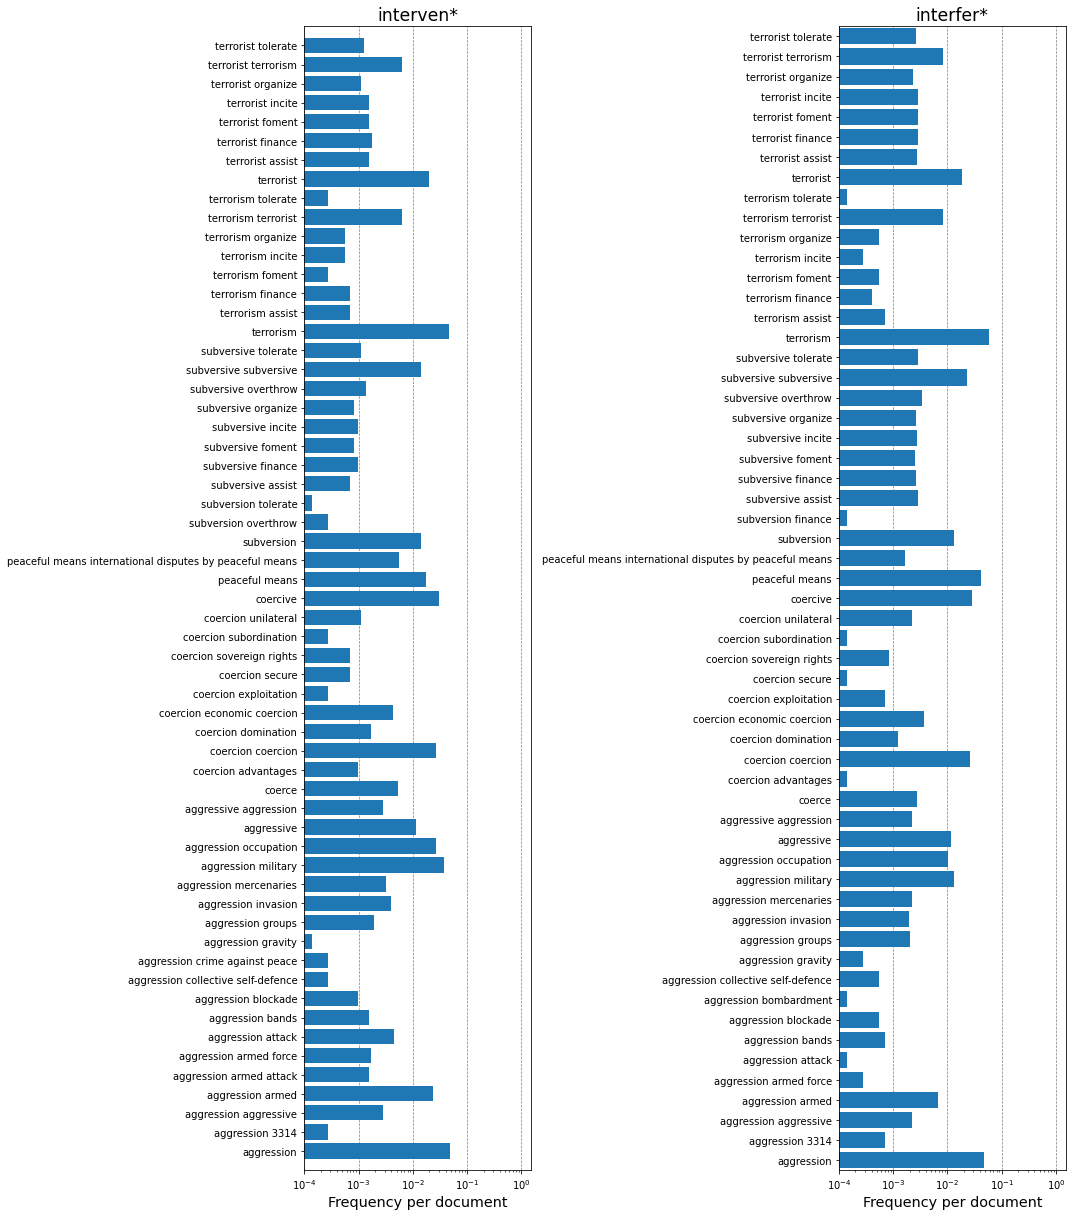

In [9]:
plot_formula_frequency(counter_formulas, log=True)